In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
from fredapi import Fred
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Load the data into a DataFrame
df = pd.read_csv('CAPSTONEDATA.csv')

# Data Cleaning and Preprocessing

In [3]:
# Display the first few rows
df.head()

,MONTH,STOCKS,BONDS,60_40,CPI,MONEYSUPPLY,UNRATE,GDP,US3MONTH,US10Y,30YMORTGAGE,PMI
0,1/1/84,-5.57,-0.51,-3.546,101.9,2.112300e+12,8.5,3.908050e+12,8.88,11.59,13.43,66.0
1,2/1/84,0.25,-1.95,-0.630,102.4,2.123500e+12,8.3,3.908050e+12,8.97,11.76,13.43,69.9
2,3/1/84,0.02,-1.20,-0.468,102.6,2.138200e+12,8.0,3.908050e+12,8.89,11.63,13.29,60.5
3,4/1/84,-0.54,-3.49,-1.720,103.1,2.158200e+12,7.8,4.009600e+12,9.14,12.07,13.25,61.3
4,5/1/84,-2.13,0.01,-1.274,103.4,2.175200e+12,7.8,4.009600e+12,9.72,12.39,13.55,58.9


In [4]:
# Check for duplicates 
print(df.duplicated().sum())

0


In [5]:
# Remove duplicates
initial_shape = df.shape
print('Initial shape:', initial_shape)
df.drop_duplicates(inplace=True)
print('Shape after removing duplicates:', df.shape)

Initial shape: (486, 12)
Shape after removing duplicates: (486, 12)


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

MONTH          0
STOCKS         0
BONDS          0
60_40          0
CPI            0
MONEYSUPPLY    0
UNRATE         0
GDP            0
US3MONTH       0
US10Y          0
30YMORTGAGE    0
PMI            0
dtype: int64


In [7]:
# Print data types
print(df.dtypes)

MONTH           object
STOCKS         float64
BONDS          float64
60_40          float64
CPI            float64
MONEYSUPPLY    float64
UNRATE         float64
GDP            float64
US3MONTH       float64
US10Y          float64
30YMORTGAGE    float64
PMI            float64
dtype: object


In [8]:
# Convert MONTH to datetime

df['MONTH'] = pd.to_datetime(df['MONTH'])

In [9]:
# Print data types
print(df.dtypes)

MONTH          datetime64[ns]
STOCKS                float64
BONDS                 float64
60_40                 float64
CPI                   float64
MONEYSUPPLY           float64
UNRATE                float64
GDP                   float64
US3MONTH              float64
US10Y                 float64
30YMORTGAGE           float64
PMI                   float64
dtype: object


In [10]:
# Display the first few rows to confirm the change
df.head()

,MONTH,STOCKS,BONDS,60_40,CPI,MONEYSUPPLY,UNRATE,GDP,US3MONTH,US10Y,30YMORTGAGE,PMI
0,1984-01-01,-5.57,-0.51,-3.546,101.9,2.112300e+12,8.5,3.908050e+12,8.88,11.59,13.43,66.0
1,1984-02-01,0.25,-1.95,-0.630,102.4,2.123500e+12,8.3,3.908050e+12,8.97,11.76,13.43,69.9
2,1984-03-01,0.02,-1.20,-0.468,102.6,2.138200e+12,8.0,3.908050e+12,8.89,11.63,13.29,60.5
3,1984-04-01,-0.54,-3.49,-1.720,103.1,2.158200e+12,7.8,4.009600e+12,9.14,12.07,13.25,61.3
4,1984-05-01,-2.13,0.01,-1.274,103.4,2.175200e+12,7.8,4.009600e+12,9.72,12.39,13.55,58.9


In [11]:
# Save the cleaned data to a new CSV file
df.to_csv('capstone_cleaned.csv', index=False)

---


**Now, to do some exploratory data analysis in order to gain a better understanding of the data.**


---

# Exploratory Data Analysis (EDA)

***The first few rows give a glimpse of the data, showing various economic indicators and asset class returns over time.***

In [12]:
#Descriptive statistics for each column
print(df.describe())

           STOCKS       BONDS       60_40         CPI   MONEYSUPPLY  \
count  486.000000  486.000000  486.000000  486.000000  4.860000e+02   
mean     0.742634    0.298436    0.564955  191.766975  7.973549e+12   
std      3.577083    1.999624    2.295137   54.849473  5.530631e+12   
min    -19.380000   -5.720000  -11.496000  101.900000  2.112300e+12   
25%     -0.812500   -1.027500   -0.799000  146.825000  3.474600e+12   
50%      1.060000    0.280000    0.715000  187.700000  6.107550e+12   
75%      2.890000    1.497500    2.013000  234.802500  1.119888e+13   
max     12.040000   11.220000    7.732000  314.330000  2.172230e+13   

           UNRATE           GDP    US3MONTH       US10Y  30YMORTGAGE  \
count  486.000000  4.860000e+02  486.000000  486.000000   486.000000   
mean     5.858025  1.273690e+13    3.345885    5.029527     6.792942   
std      1.674320  6.464578e+12    2.707276    2.713997     2.634521   
min      3.400000  7.030000e+00   -0.040000    0.530000     2.670000   


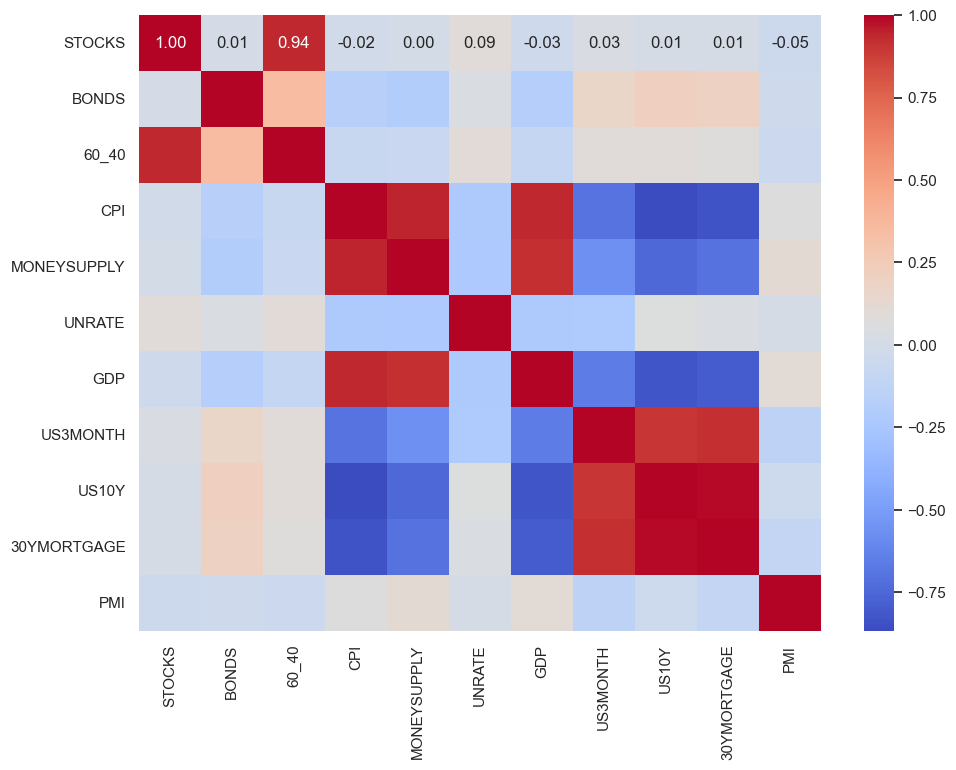

In [13]:
# Correlation matrix and heatmap
corr = df.corr()
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

***The heatmap shows some interesting correlations, such as a strong positive correlation between GDP and M2SL (money supply). There are also notable correlations between interest rates (FEDFUNDS, MORTGAGE30US) and bond returns.***

***To further explore the data, we could create additional visualizations like line plots to show trends over time, or scatter plots to examine relationships between specific variables. We should also consider any data transformations or feature engineering that could help with modeling in later stages***

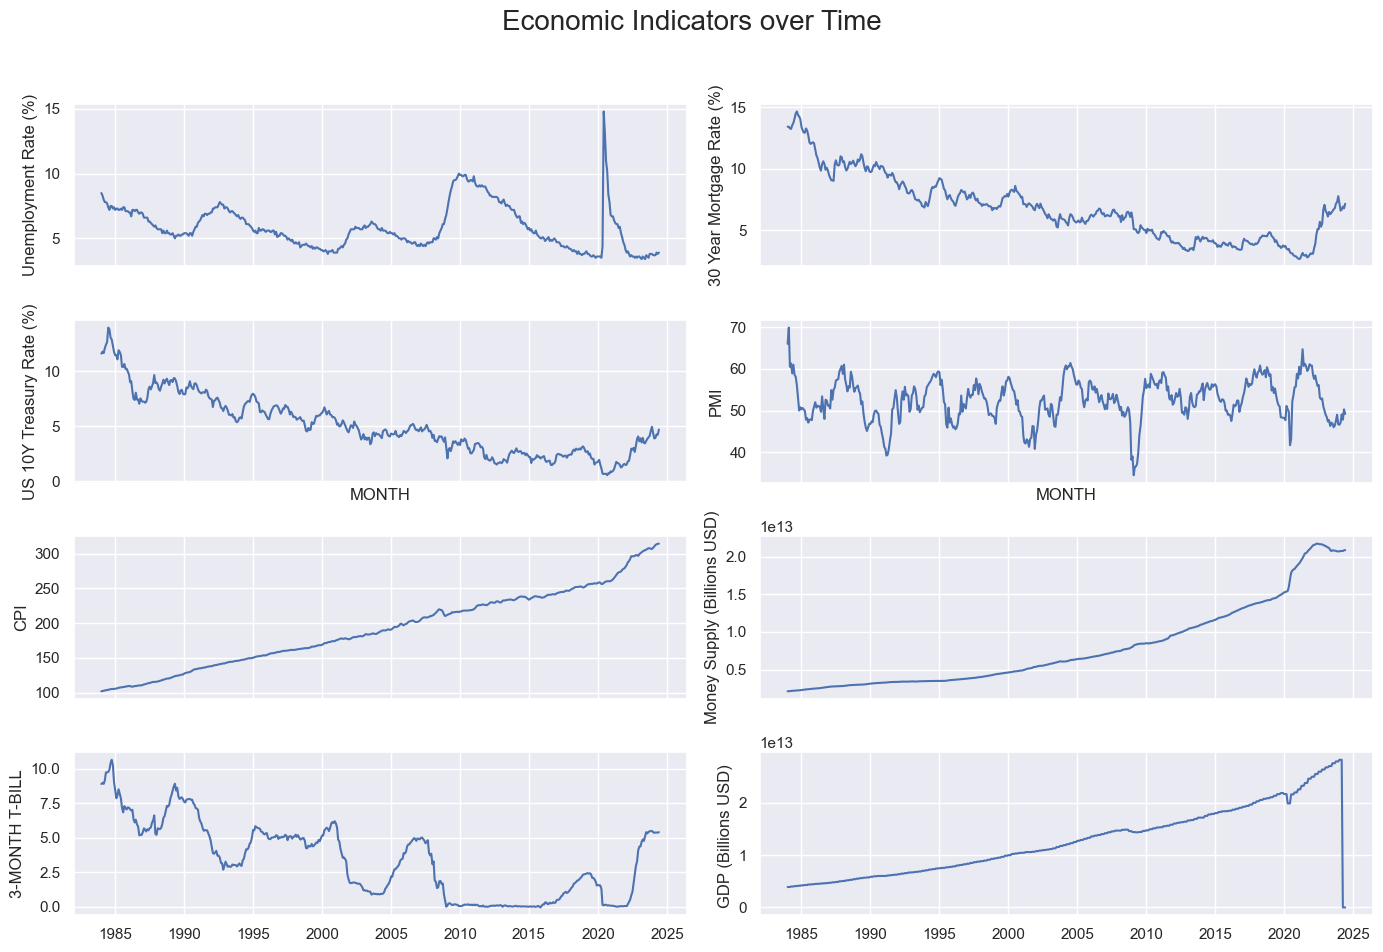

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(14,10), sharex=True)

cols = ['UNRATE', '30YMORTGAGE', 'US10Y','PMI', 'CPI', 'MONEYSUPPLY', 'US3MONTH', 'GDP'] 
labels = ['Unemployment Rate (%)',
          '30 Year Mortgage Rate (%)', 'US 10Y Treasury Rate (%)', 'PMI', 'CPI', 'Money Supply (Billions USD)', '3-MONTH T-BILL', 'GDP (Billions USD) ']

for ax, col, label in zip(axes.flatten(), cols, labels):
    ax.plot(df['MONTH'], df[col])
    ax.set_ylabel(label)
    
axes[1,0].set_xlabel('MONTH') 
axes[1,1].set_xlabel('MONTH')

fig.suptitle('Economic Indicators over Time', size=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

***These line plots show the trends in the macroeconomic indicators over time. This helps provide a quick contextual snapshot on the overall economic conditions during the time period covered by the dataset***

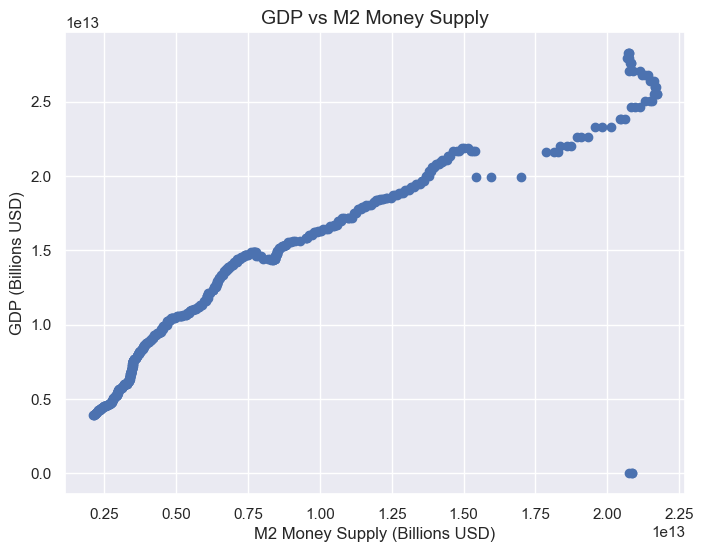

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df['MONEYSUPPLY'], df['GDP'])
plt.xlabel('M2 Money Supply (Billions USD)')
plt.ylabel('GDP (Billions USD)')
plt.title('GDP vs M2 Money Supply', size=14)
plt.show()

**This scatter plot illustrates the strong positive relationship between GDP and the M2 money supply, which was also evident in the correlation matrix.**

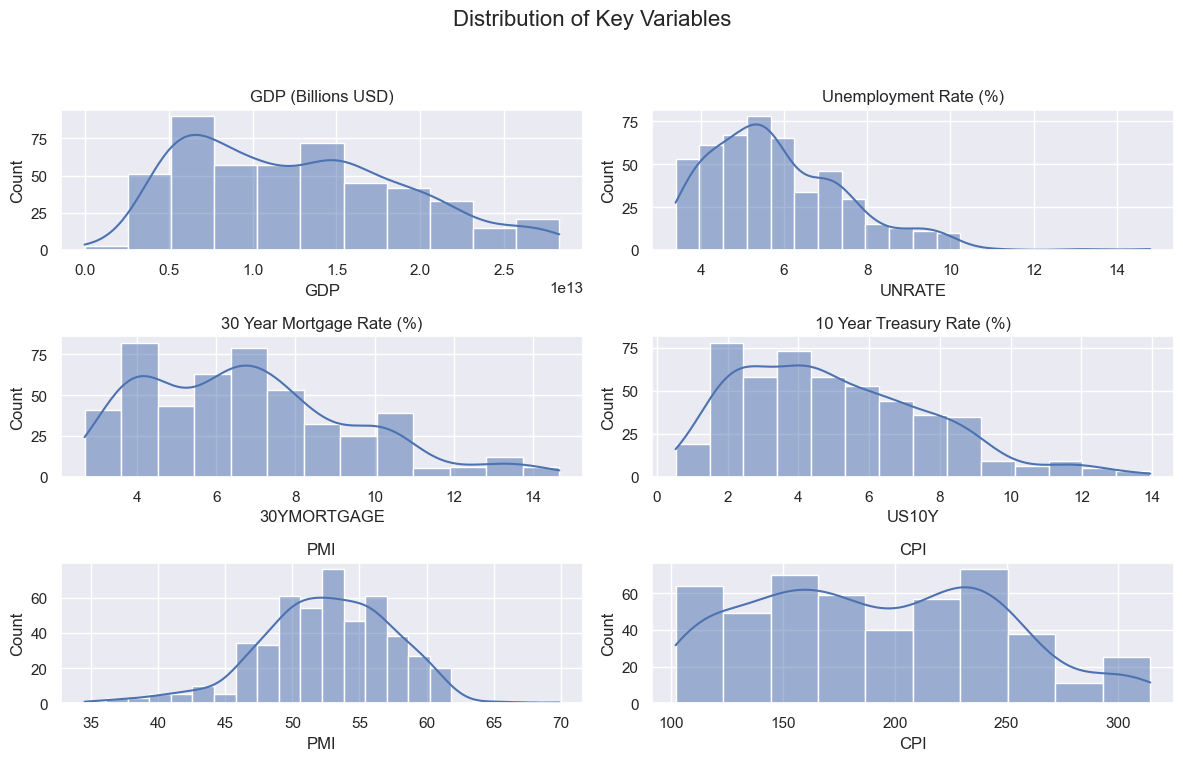

In [17]:
# Distribution plots for key variables
fig, axes = plt.subplots(3, 2, figsize=(12,8))

cols = ['GDP', 'UNRATE', '30YMORTGAGE', 'US10Y', 'PMI', 'CPI', 'MONEYSUPPLY'] 
labels = ['GDP (Billions USD)', 'Unemployment Rate (%)',
          '30 Year Mortgage Rate (%)', '10 Year Treasury Rate (%)', 'PMI', 'CPI', 'Money Supply (%)']

for ax, col, label in zip(axes.flatten(), cols, labels):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(label)
    
fig.suptitle('Distribution of Key Variables', size=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Observations:**

- Most of the variables exhibit a right-skewed distribution, suggesting some outliers.

- `GDP`, the unemployment rate (`UNRATE`), and `CPI` appear to have a bimodal distribution, suggesting two distinct economic regimes during the time period.

- `PMI` seems to be normally distributed

In [18]:
# Select key columns for EDA
key_cols = ['MONTH', 'GDP', 'UNRATE', '30YMORTGAGE', 'US10Y', 'PMI', 'CPI', 'MONEYSUPPLY']
df_key = df[key_cols]

print('New dataframe shape:', df_key.shape)
df_key.head()

New dataframe shape: (486, 8)


,MONTH,GDP,UNRATE,30YMORTGAGE,US10Y,PMI,CPI,MONEYSUPPLY
0,1984-01-01,3.908050e+12,8.5,13.43,11.59,66.0,101.9,2.112300e+12
1,1984-02-01,3.908050e+12,8.3,13.43,11.76,69.9,102.4,2.123500e+12
2,1984-03-01,3.908050e+12,8.0,13.29,11.63,60.5,102.6,2.138200e+12
3,1984-04-01,4.009600e+12,7.8,13.25,12.07,61.3,103.1,2.158200e+12
4,1984-05-01,4.009600e+12,7.8,13.55,12.39,58.9,103.4,2.175200e+12


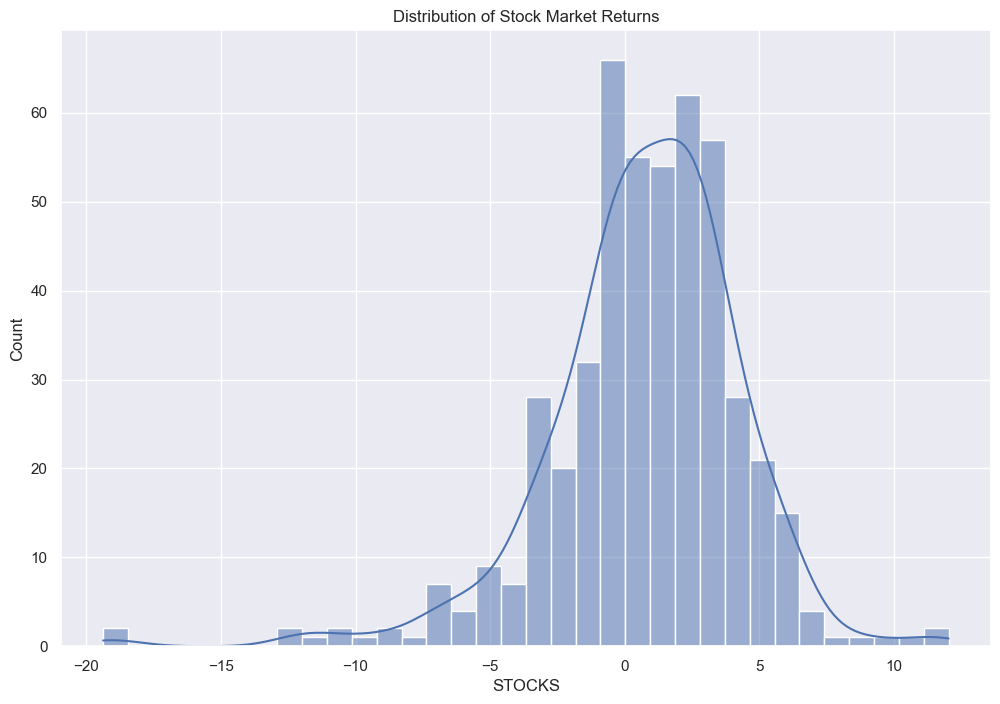

In [19]:
#Histogram of Stock Market Returns
plt.figure(figsize=(12,8))
sns.histplot(df['STOCKS'], kde=True)
plt.title('Distribution of Stock Market Returns')
plt.show()

We can see that the distribution is someone normal though the data does exhibit skewness, as financial markets are heavily skewed.

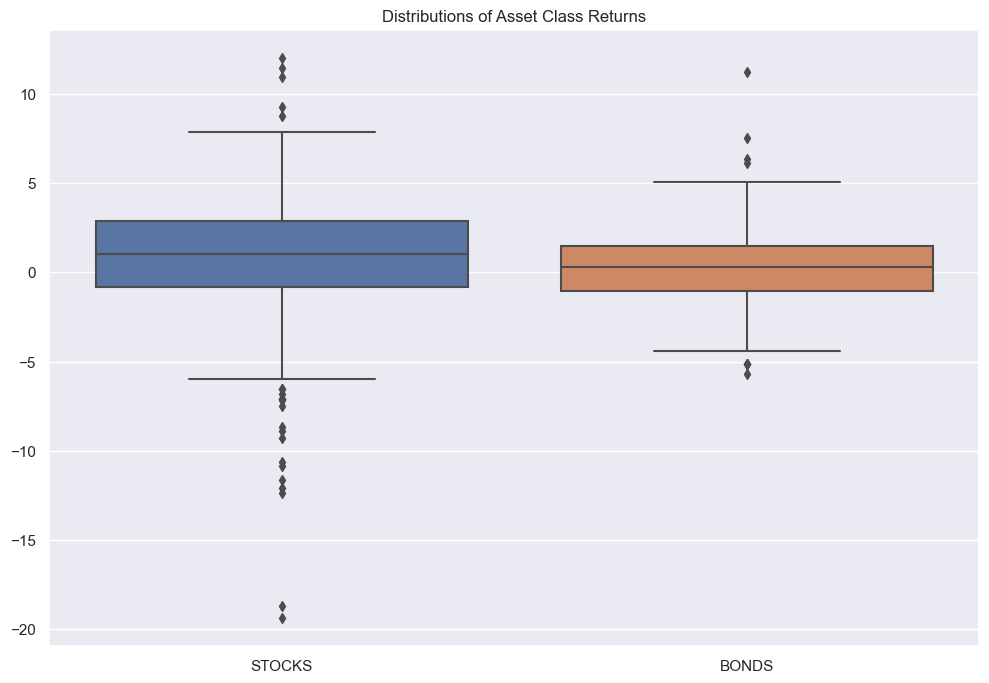

In [20]:
#Box plots showing the Distributions of Asset Class Returns
plt.figure(figsize=(12,8)) 
sns.boxplot(data=df[['STOCKS', 'BONDS']])
plt.title('Distributions of Asset Class Returns')
plt.show()

We can see here that international developed stocks and emergining market stocks tend to be more volatile and have a wider range of returns. These assets are often seen as more speculative than US large cap stocks.

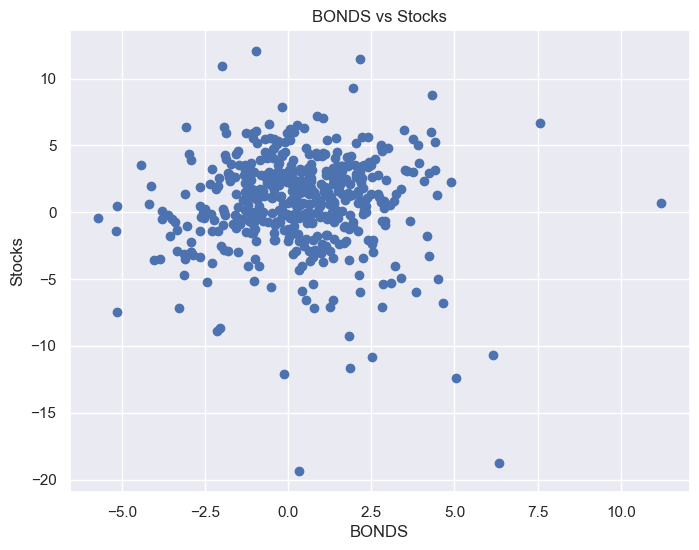

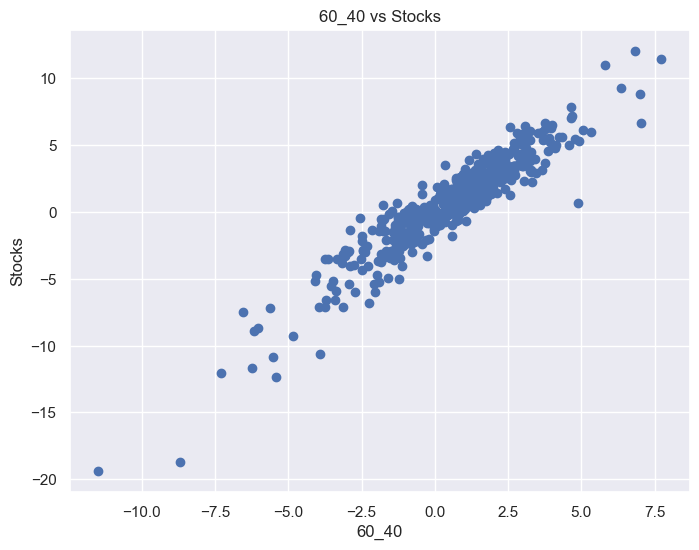

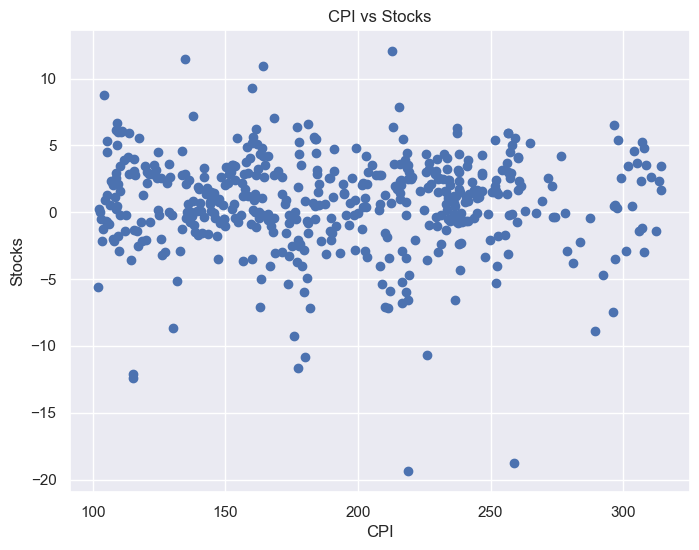

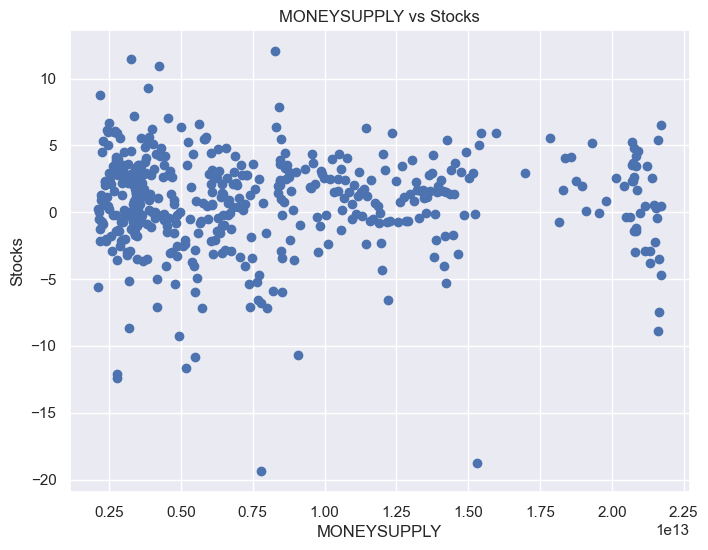

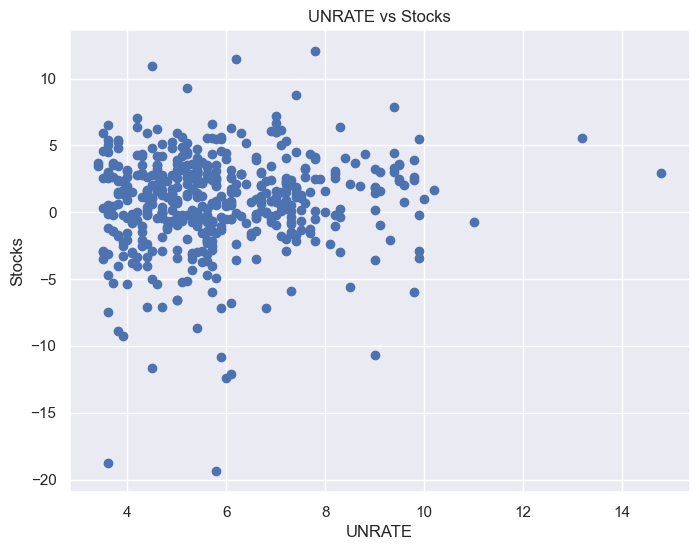

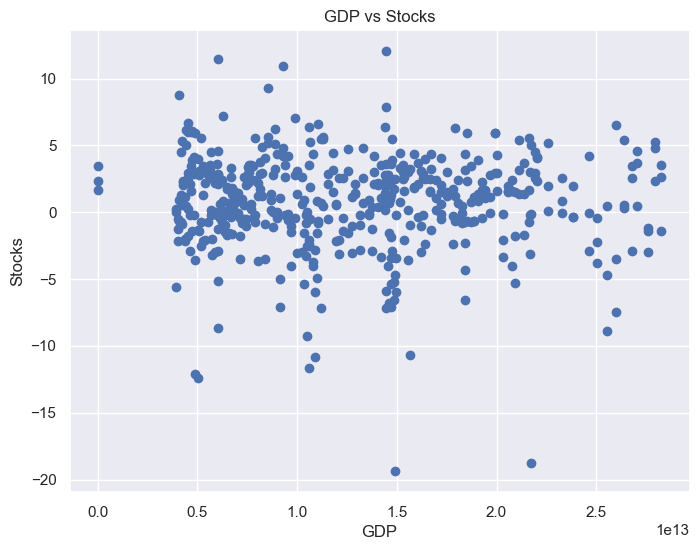

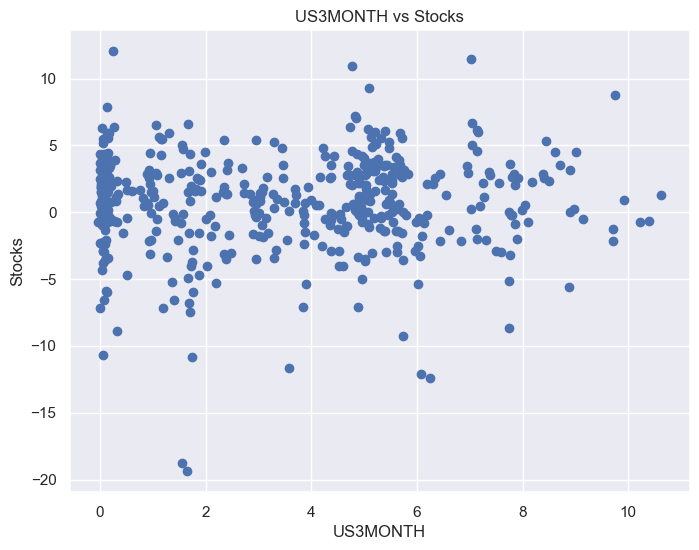

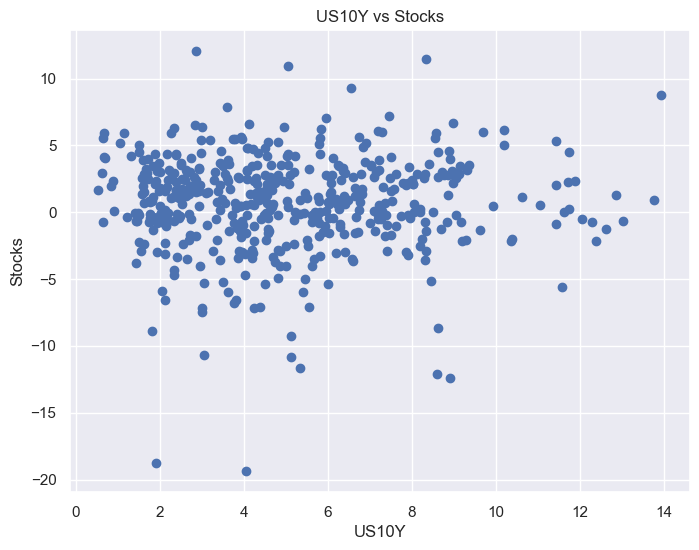

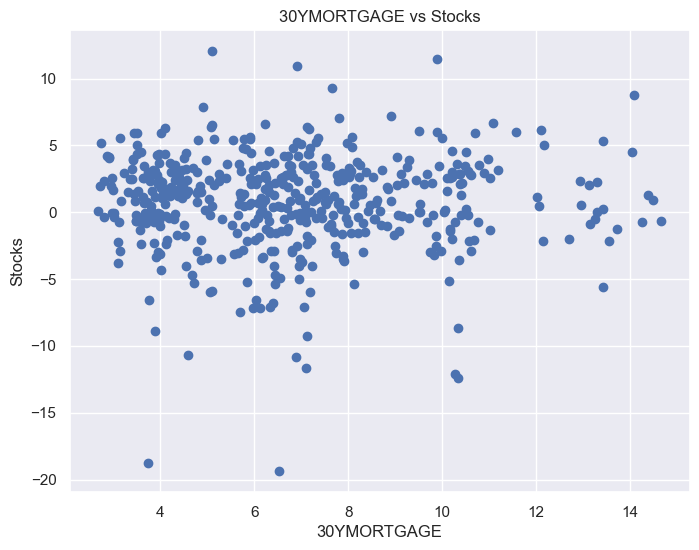

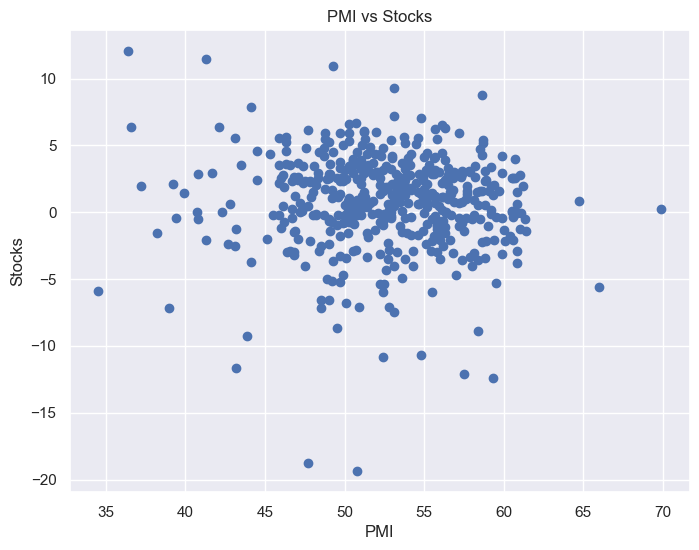

In [21]:
# Scatter plots for key variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    if col != 'MONTH' and col != 'STOCKS':
        plt.figure(figsize=(8,6), dpi=100)
        plt.scatter(df[col], df['STOCKS'])
        plt.xlabel(col)
        plt.ylabel('Stocks')
        plt.title(f'{col} vs Stocks')
        plt.grid(True)
        plt.show()

- CPIAUCSL (Consumer Price Index) shows a slight negative correlation with stock returns, suggesting stocks tend to underperform in high inflation environments

- The 10-year minus 2-year Treasury yield spread (T10Y2Y) has a weak positive relationship with stock returns. A steeper yield curve may be a bullish signal.

- 30-year mortgage rates show little correlation with stock returns over this period.

- The federal funds rate has a negative relationship with stocks, as higher rates tend to pressure valuations.

- Unemployment rate (UNRATE) shows a negative correlation - stocks tend to struggle when unemployment is high.

- The 10-year minus 3-month Treasury yield spread (T10Y3M) has a positive relationship, again suggesting a steeper curve is bullish.

- M2 money supply growth has little correlation with stock returns.

- GDP growth shows a positive relationship with stock performance as expected.

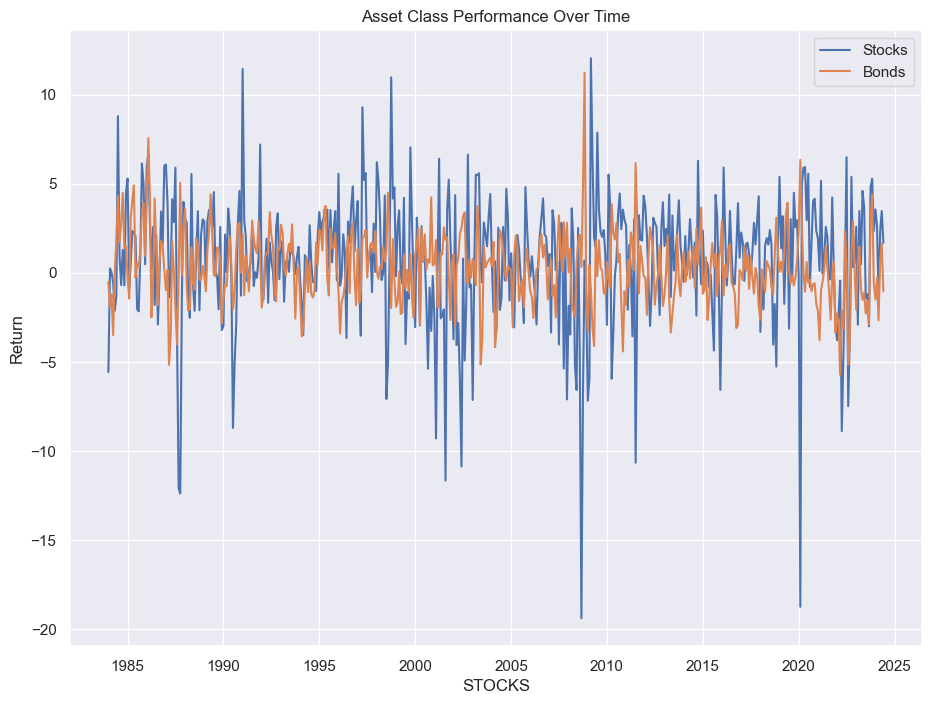

In [22]:
# Plot trends for key asset classes
plt.plot(df['MONTH'], df['STOCKS'], label='Stocks')
plt.plot(df['MONTH'], df['BONDS'], label='Bonds')


plt.title('Asset Class Performance Over Time')
plt.xlabel('STOCKS')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

---

# Preprocessing

---

**Now, I will look into using things like lagged variables, time series decomposition, and other preprocessing techniques as I begin preparing to build the time series models.This should help to improve the accuracy of my models.**

In [23]:
# load the cleaned data
df = pd.read_csv('capstone_cleaned.csv')

# convert the 'MONTH' column to datetime format
df['MONTH'] = pd.to_datetime(df['MONTH'])

# set the 'MONTH' column as the index
df.set_index('MONTH', inplace=True)

# Create interaction terms
df['CPI_MONEYSUPPLY'] = df['CPI'] * df['MONEYSUPPLY']
df['UNRATE_GDP'] = df['UNRATE'] * df['GDP']
df['US3MONTH_US10Y'] = df['US3MONTH'] * df['US10Y']
df['30YMORTGAGE_PMI'] = df['30YMORTGAGE'] * df['PMI']

# Calculate rolling statistics
df['CPI_rolling_mean'] = df['CPI'].rolling(window=3).mean()
df['MONEYSUPPLY_rolling_mean'] = df['MONEYSUPPLY'].rolling(window=3).mean()
df['UNRATE_rolling_mean'] = df['UNRATE'].rolling(window=3).mean()
df['GDP_rolling_mean'] = df['GDP'].rolling(window=3).mean()
df['US3MONTH_rolling_mean'] = df['US3MONTH'].rolling(window=3).mean()
df['US10Y_rolling_mean'] = df['US10Y'].rolling(window=3).mean()
df['30YMORTGAGE_rolling_mean'] = df['30YMORTGAGE'].rolling(window=3).mean()
df['PMI_rolling_mean'] = df['PMI'].rolling(window=3).mean()

# fill the NaN values by backfilling
df.fillna(method='bfill', inplace=True)

# Print the first few rows of the dataframe to confirm the changes
print("Interaction terms & Rolling Statistics created.")

# Display the first few rows of the dataframe to verify the new column
df.head()

Interaction terms & Rolling Statistics created.


,STOCKS,BONDS,60_40,CPI,MONEYSUPPLY,UNRATE,GDP,US3MONTH,US10Y,30YMORTGAGE,...,US3MONTH_US10Y,30YMORTGAGE_PMI,CPI_rolling_mean,MONEYSUPPLY_rolling_mean,UNRATE_rolling_mean,GDP_rolling_mean,US3MONTH_rolling_mean,US10Y_rolling_mean,30YMORTGAGE_rolling_mean,PMI_rolling_mean
MONTH,,,,,,,,,,,,,,,,,,,,,
1984-01-01,-5.57,-0.51,-3.546,101.9,2.112300e+12,8.5,3.908050e+12,8.88,11.59,13.43,...,102.9192,886.380,102.300000,2.124667e+12,8.266667,3.908050e+12,8.913333,11.66,13.383333,65.466667
1984-02-01,0.25,-1.95,-0.630,102.4,2.123500e+12,8.3,3.908050e+12,8.97,11.76,13.43,...,105.4872,938.757,102.300000,2.124667e+12,8.266667,3.908050e+12,8.913333,11.66,13.383333,65.466667
1984-03-01,0.02,-1.20,-0.468,102.6,2.138200e+12,8.0,3.908050e+12,8.89,11.63,13.29,...,103.3907,804.045,102.300000,2.124667e+12,8.266667,3.908050e+12,8.913333,11.66,13.383333,65.466667
1984-04-01,-0.54,-3.49,-1.720,103.1,2.158200e+12,7.8,4.009600e+12,9.14,12.07,13.25,...,110.3198,812.225,102.700000,2.139967e+12,8.033333,3.941900e+12,9.000000,11.82,13.323333,63.900000
1984-05-01,-2.13,0.01,-1.274,103.4,2.175200e+12,7.8,4.009600e+12,9.72,12.39,13.55,...,120.4308,798.095,103.033333,2.157200e+12,7.866667,3.975750e+12,9.250000,12.03,13.363333,60.233333


In [25]:
# Check if 'combined_df' is defined
try:
    combined_df.head()
except NameError:
    # Assuming 'df' is loaded and contains the necessary columns
    # Prepare the data by creating lagged features
    lagged_features = df[['CPI', 'MONEYSUPPLY', 'UNRATE', 'GDP', 'US3MONTH', 'US10Y', '30YMORTGAGE', 'PMI']].shift(1)
    lagged_features.columns = ['CPI_LAG', 'MONEYSUPPLY_LAG', 'UNRATE_LAG', 'GDP_LAG', 'US3MONTH_LAG', 'US10Y_LAG', '30YMORTGAGE_LAG', 'PMI_LAG']
    combined_df = pd.concat([df, lagged_features], axis=1).dropna()


# Define the independent variables (X) and the dependent variable (y)
X = combined_df[['CPI_LAG', 'MONEYSUPPLY_LAG', 'UNRATE_LAG', 'GDP_LAG', 'US3MONTH_LAG', 'US10Y_LAG', '30YMORTGAGE_LAG', 'PMI_LAG']]
y_stocks = combined_df['STOCKS']
y_bonds = combined_df['BONDS']

# Fit the OLS models
model_stocks_ols = OLS(y_stocks, X).fit()
model_bonds_ols = OLS(y_bonds, X).fit()

# Calculate residuals for ARIMA models
stock_residuals = y_stocks - model_stocks_ols.predict(X)
bond_residuals = y_bonds - model_bonds_ols.predict(X)

# Fit ARIMA models on residuals
model_stock_arima = ARIMA(stock_residuals, order=(1, 0, 0)).fit()
model_bond_arima = ARIMA(bond_residuals, order=(1, 0, 0)).fit()

# Evaluate the models
mse_stock = mean_squared_error(y_stocks, model_stocks_ols.predict(X) + model_stock_arima.predict())
mae_stock = mean_absolute_error(y_stocks, model_stocks_ols.predict(X) + model_stock_arima.predict())
mse_bond = mean_squared_error(y_bonds, model_bonds_ols.predict(X) + model_bond_arima.predict())
mae_bond = mean_absolute_error(y_bonds, model_bonds_ols.predict(X) + model_bond_arima.predict())

print('Stock Returns - MSE:', mse_stock, 'MAE:', mae_stock)
print('Bond Returns - MSE:', mse_bond, 'MAE:', mae_bond)

Stock Returns - MSE: 11.808341416029188 MAE: 2.4972634830020115
Bond Returns - MSE: 3.3902192090776344 MAE: 1.429743808314798


In [26]:
# save combined df
combined_df.to_csv('combined_df.csv', index=True)

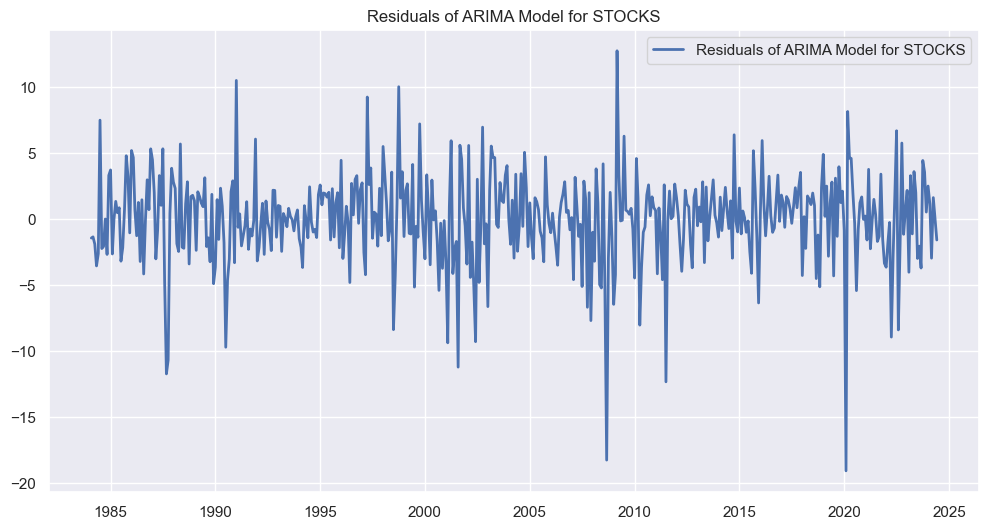

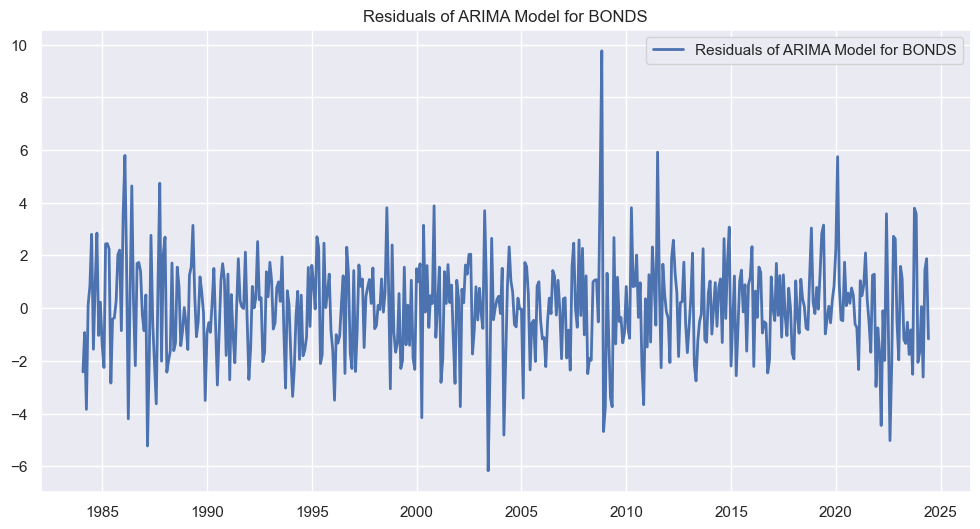

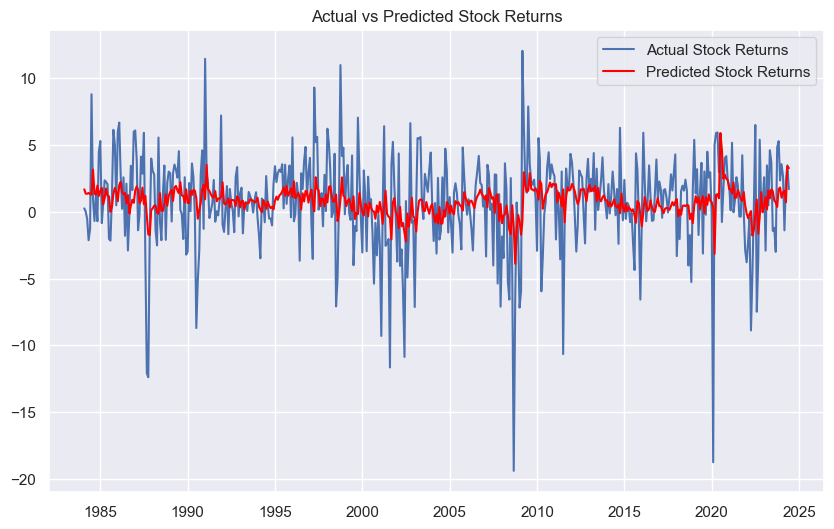

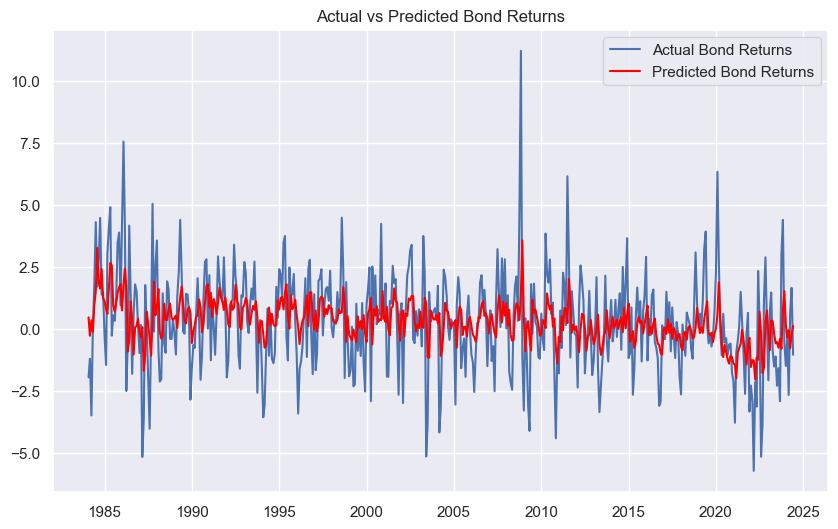

In [27]:
import matplotlib.pyplot as plt

# Plot the residuals for the ARIMA models
residuals_stock_arima = model_stock_arima.resid
residuals_bond_arima = model_bond_arima.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals_stock_arima, label='Residuals of ARIMA Model for STOCKS', linewidth=2)
plt.title('Residuals of ARIMA Model for STOCKS')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(residuals_bond_arima, label='Residuals of ARIMA Model for BONDS', linewidth=2)
plt.title('Residuals of ARIMA Model for BONDS')
plt.legend()
plt.show()

# Plot the actual vs predicted stock returns
plt.figure(figsize=(10, 6))
plt.plot(y_stocks, label='Actual Stock Returns')
plt.plot(model_stocks_ols.predict(X) + model_stock_arima.predict(), label='Predicted Stock Returns', color='red')
plt.title('Actual vs Predicted Stock Returns')
plt.legend()
plt.show()

# Plot the actual vs predicted bond returns
plt.figure(figsize=(10, 6))
plt.plot(y_bonds, label='Actual Bond Returns')
plt.plot(model_bonds_ols.predict(X) + model_bond_arima.predict(), label='Predicted Bond Returns', color='red')
plt.title('Actual vs Predicted Bond Returns')
plt.legend()
plt.show()

ARIMA Model: This is an autoregressive integrated moving average (ARIMA) model. The model is fitted to the historical stock returns series and the next month's stock return is forecasted. This type of model is commonly used in financial forecasting.

Forecasted Stock Returns for each of the next 12 Months:
 2024-07-01    0.943484
2024-08-01    0.783347
2024-09-01    0.748996
2024-10-01    0.741627
2024-11-01    0.740047
2024-12-01    0.739708
2025-01-01    0.739635
2025-02-01    0.739619
2025-03-01    0.739616
2025-04-01    0.739615
2025-05-01    0.739615
2025-06-01    0.739615
Freq: MS, Name: predicted_mean, dtype: float64


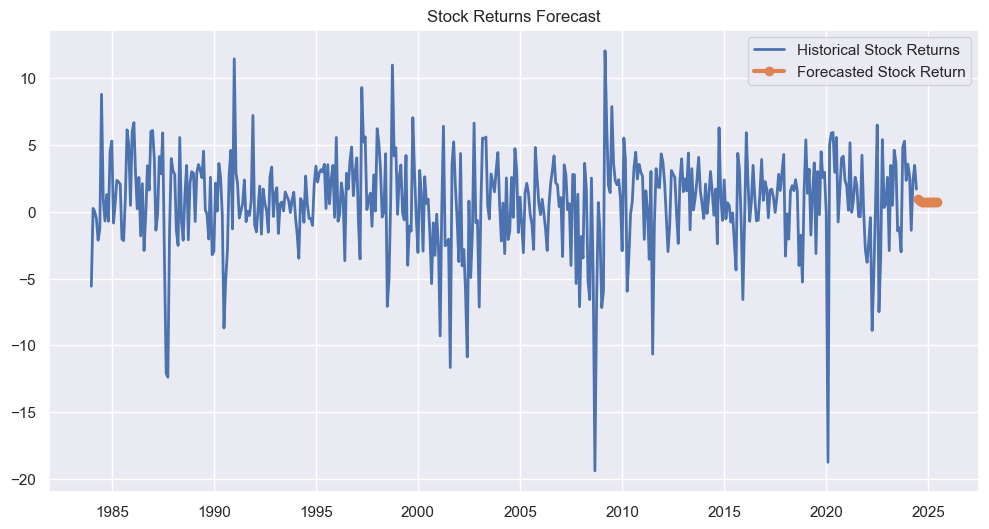

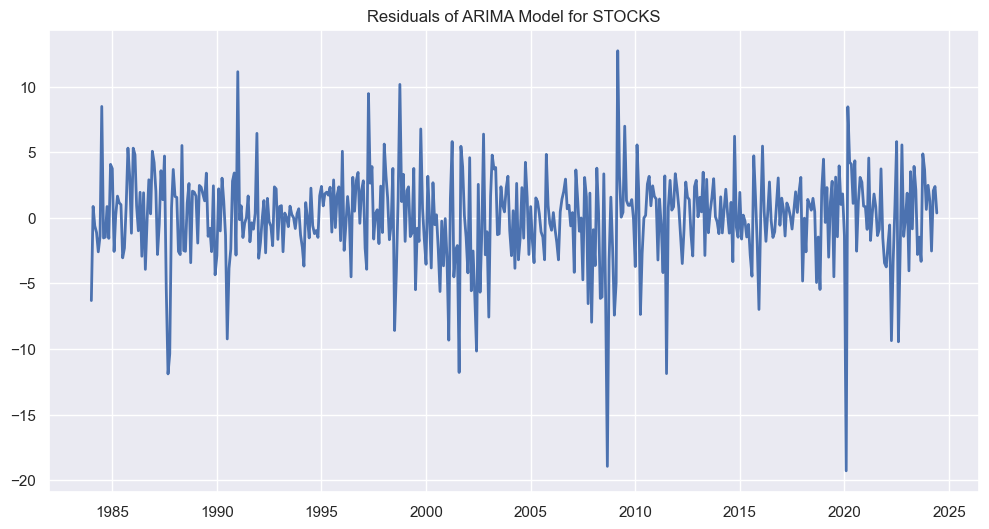

                               SARIMAX Results                                
Dep. Variable:                 STOCKS   No. Observations:                  486
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1297.138
Date:                Thu, 11 Jul 2024   AIC                           2600.277
Time:                        05:46:19   BIC                           2612.836
Sample:                    01-01-1984   HQIC                          2605.211
                         - 06-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7396      0.227      3.254      0.001       0.294       1.185
ar.L1          0.2145      0.037      5.789      0.000       0.142       0.287
sigma2        12.1829      0.470     25.912      0.0

In [28]:
# Define the stock returns series
stock_returns = df['STOCKS']

# Fit the ARIMA model
model_stock = ARIMA(stock_returns, order=(1, 0, 0))
model_stock_fit = model_stock.fit()

# Forecast the next month's stock return
forecast_stock = model_stock_fit.forecast(steps=12)
print('Forecasted Stock Returns for each of the next 12 Months:\n', forecast_stock)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(stock_returns, label='Historical Stock Returns', linewidth=2)
plt.plot(forecast_stock, label='Forecasted Stock Return', linewidth=3, marker='o')
plt.legend()
plt.title('Stock Returns Forecast')
plt.show()

# Plot the residuals
residuals = model_stock_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', linewidth=2)
plt.title('Residuals of ARIMA Model for STOCKS')
plt.show()


# Summary of the model
print(model_stock_fit.summary())

1. **Dependent Variable and Model Type**:
   - **Dependent Variable**: The variable being predicted is "STOCKS".
   - **Model**: The model used is ARIMA(1, 0, 0), indicating an AutoRegressive model of order 1, with no differencing (I=0) and no moving average components (MA=0).

2. **Date and Sample**:
   - **Date**: The model was run on July 8, 2024, at 21:31:56.
   - **Sample Period**: The data spans from January 1, 1984, to June 1, 2024.

3. **Model Fit Statistics**:
   - **Number of Observations**: 486.
   - **Log Likelihood**: -1297.138, indicating the log likelihood of the model given the data.
   - **AIC/BIC/HQIC**: These are information criteria used to compare models. Lower values generally indicate a better model fit with fewer parameters.

4. **Coefficients**:
   - **const**: The constant term is 0.7396 with a standard error of 0.227, statistically significant as indicated by the p-value (P>|z|) of 0.001.
   - **ar.L1**: The coefficient for the first lag in the AR model is 0.2145, also significant with a p-value of 0.000.

5. **Sigma^2**:
   - Represents the variance of the residuals (errors) of the model, estimated at 12.1829 with a standard error of 0.470.

6. **Diagnostic Tests**:
   - **Ljung-Box Test**: A test for autocorrelation in the residuals at lag 1 (Q) shows a statistic of 0.16 and a p-value of 0.69, suggesting no significant autocorrelation.
   - **Heteroskedasticity Test**: The test statistic is 1.13 with a p-value of 0.45, indicating no significant heteroskedasticity (changing variance) in the residuals.
   - **Jarque-Bera Test**: A test for normality of residuals. The JB statistic is 454.38 with a p-value of 0.00, suggesting the residuals are not normally distributed.
   - **Skewness and Kurtosis**: The residuals have a skewness of -0.92 and a kurtosis of 7.37, further supporting the non-normality indicated by the Jarque-Bera test.

7. **Warnings**:
   - The covariance matrix of the model parameters was calculated using the outer product of gradients, which might affect the standard errors and statistical tests.

**Interpretation**:
- The model shows a significant relationship between past values of the "STOCKS" variable and its current value, as indicated by the significant AR(1) coefficient.
- The diagnostics suggest that while there is no autocorrelation or heteroskedasticity in the residuals, they are not normally distributed, which could affect inference based on the model.
- The information criteria suggest that the model fits the data reasonably well, but improvements might be possible, perhaps by considering additional lags or other forms of the model.

Forecasted Bond Returns for each of the next 12 Months:
 2024-07-01   -0.184772
2024-08-01    0.122970
2024-09-01    0.233706
2024-10-01    0.273553
2024-11-01    0.287892
2024-12-01    0.293051
2025-01-01    0.294908
2025-02-01    0.295576
2025-03-01    0.295816
2025-04-01    0.295903
2025-05-01    0.295934
2025-06-01    0.295945
Freq: MS, Name: predicted_mean, dtype: float64


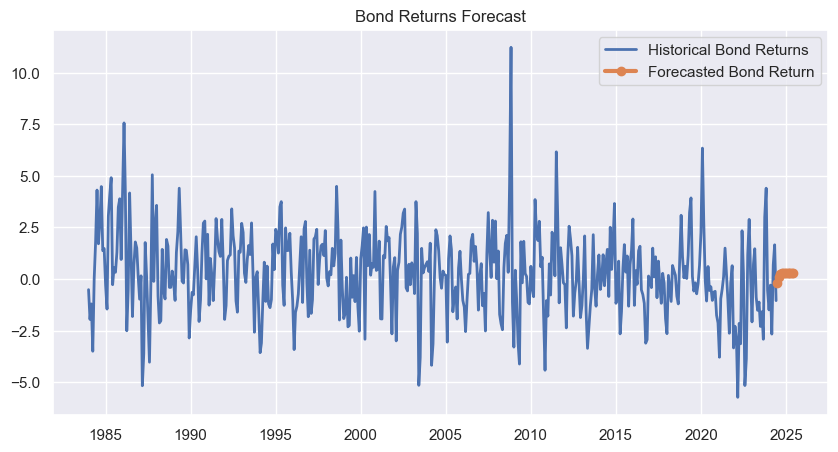

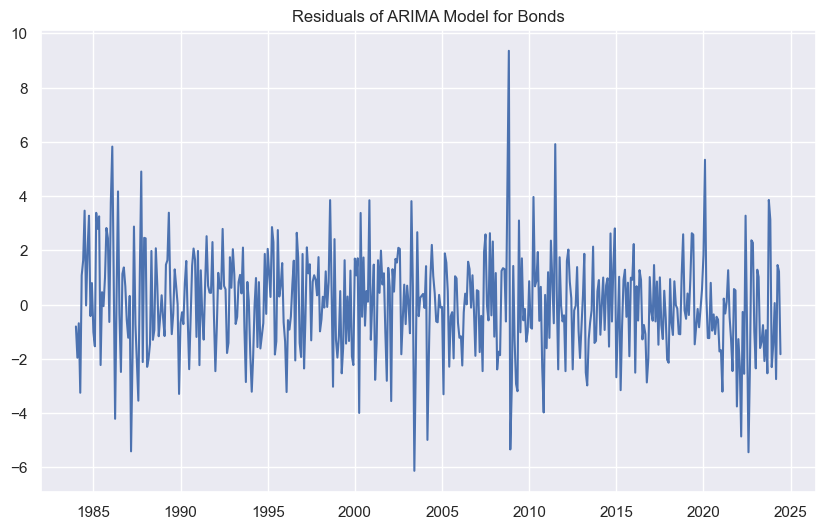

                               SARIMAX Results                                
Dep. Variable:                  BONDS   No. Observations:                  486
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -992.154
Date:                Thu, 11 Jul 2024   AIC                           1990.308
Time:                        05:47:23   BIC                           2002.866
Sample:                    01-01-1984   HQIC                          1995.241
                         - 06-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.134      2.201      0.028       0.032       0.559
ar.L1          0.3598      0.033     10.829      0.000       0.295       0.425
sigma2         3.4721      0.174     19.969      0.0

In [29]:
# Define the bond returns series
bond_returns = df['BONDS']

# Fit the ARIMA model
model_bond = ARIMA(bond_returns, order=(1, 0, 0))
model_bond_fit = model_bond.fit()

# Forecast the next month's bond return
forecast_bond = model_bond_fit.forecast(steps=12)
print('Forecasted Bond Returns for each of the next 12 Months:\n', forecast_bond)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(bond_returns, label='Historical Bond Returns', linewidth=2)
plt.plot(forecast_bond, label='Forecasted Bond Return',linewidth=3, marker='o')
plt.legend()
plt.title('Bond Returns Forecast')
plt.show()


# Plot the residuals
residuals = model_bond_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model for Bonds')
plt.show()

# Summary of the model
print(model_bond_fit.summary())

### SARIMAX Results Overview
- **Dependent Variable**: BONDS
- **Model**: ARIMA(1, 0, 0) indicating an AutoRegressive model of order 1, with no differencing and no moving average components.
- **Date and Time of Analysis**: July 8, 2024, at 21:31:56
- **Sample Period**: From January 1, 1984, to June 1, 2024
- **Number of Observations**: 486
- **Log Likelihood**: -992.154
- **AIC/BIC/HQIC**: These are criteria for model selection, where lower values generally indicate a better model. The values are 1990.308, 2002.866, and 1995.241 respectively.

### Coefficients
- **const**: Constant term is 0.2960 with a standard error of 0.134, and a p-value of 0.028, indicating statistical significance.
- **ar.L1**: Coefficient for the first lag is 0.3598, with a very low p-value (0.000), suggesting a strong and significant effect of the first lag on the dependent variable.
- **sigma2**: Variance of the model residuals is 3.4721 with a standard error of 0.174.

### Diagnostic Tests
- **Ljung-Box Test (Q)**: Statistic is 1.57 with a probability (Prob(Q)) of 0.21, indicating no significant autocorrelation in the residuals at lag 1.
- **Heteroskedasticity Test (H)**: Statistic is 0.87 with a two-sided p-value (Prob(H)) of 0.37, suggesting no significant heteroskedasticity.
- **Jarque-Bera Test (JB)**: Tests the normality of residuals. The statistic is 43.40 with a p-value of 0.00, indicating that the residuals do not follow a normal distribution.
- **Skewness and Kurtosis**: Values are 0.21 and 4.40 respectively, further supporting the non-normality of residuals.

### Warnings
- The covariance matrix of the model parameters was calculated using the outer product of gradients (complex-step), which might affect the standard errors and statistical tests.

### Interpretation
- The significant AR(1) coefficient suggests that past values of the "BONDS" variable have a strong influence on its current value.
- The diagnostics indicate that while there is no autocorrelation or heteroskedasticity in the residuals, they are not normally distributed. This could affect the reliability of some statistical tests and model assumptions.
- The model fits the data reasonably well based on the AIC, BIC, and HQIC values, but the non-normality of residuals could be a concern for inference based on the model.

This analysis provides insights into the behavior of bond prices over time, showing dependencies on their past values, which can be crucial for forecasting and financial analysis.

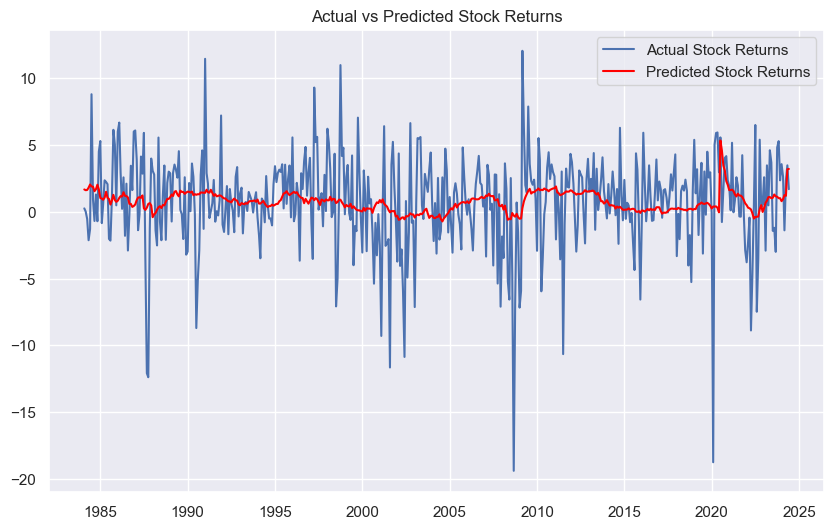

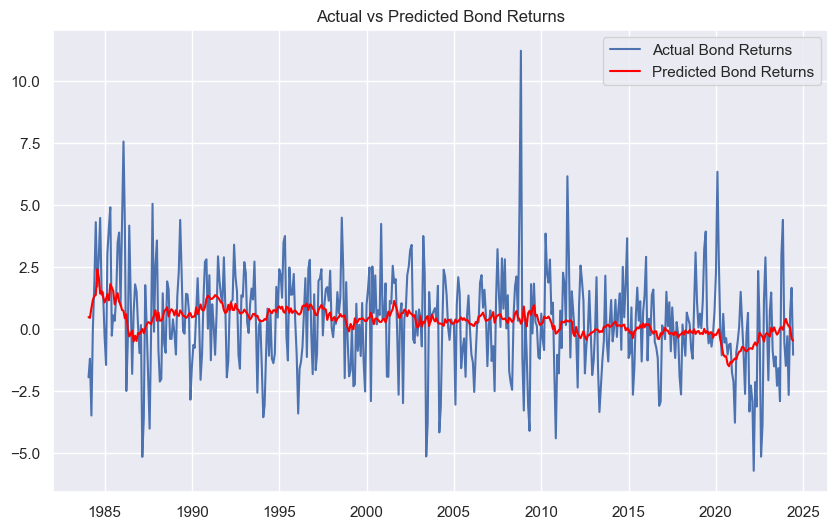

In [30]:
# Prepare the data by creating lagged features
lagged_features = df[['CPI', 'MONEYSUPPLY', 'UNRATE', 'GDP', 'US3MONTH', 'US10Y', '30YMORTGAGE', 'PMI']].shift(1)
lagged_features.columns = ['CPI_LAG', 'MONEYSUPPLY_LAG', 'UNRATE_LAG', 'GDP_LAG', 'US3MONTH_LAG', 'US10Y_LAG', '30YMORTGAGE_LAG', 'PMI_LAG']

# Combine the lagged features with the original dataframe
combined_df = pd.concat([df, lagged_features], axis=1).dropna()

# Define the independent variables (X) and the dependent variable (y)
X = combined_df[['CPI_LAG', 'MONEYSUPPLY_LAG', 'UNRATE_LAG', 'GDP_LAG', 'US3MONTH_LAG', 'US10Y_LAG', '30YMORTGAGE_LAG', 'PMI_LAG']]
y_stocks = combined_df['STOCKS']
y_bonds = combined_df['BONDS']

# Fit the OLS model for stock returns
model_stocks_ols = OLS(y_stocks, X).fit()

# Fit the OLS model for bond returns
model_bonds_ols = OLS(y_bonds, X).fit()

# Generate predictions for stock and bond returns
stock_predictions = model_stocks_ols.predict(X)
bond_predictions = model_bonds_ols.predict(X)

# Add predictions to the dataframe
combined_df['STOCK_PREDICTIONS'] = stock_predictions
combined_df['BOND_PREDICTIONS'] = bond_predictions


# Plot the actual vs predicted stock returns
plt.figure(figsize=(10, 6))
plt.plot(combined_df['STOCKS'], label='Actual Stock Returns')
plt.plot(combined_df['STOCK_PREDICTIONS'], label='Predicted Stock Returns', color='red')
plt.title('Actual vs Predicted Stock Returns')
plt.legend()
plt.show()

# Plot the actual vs predicted bond returns
plt.figure(figsize=(10, 6))
plt.plot(combined_df['BONDS'], label='Actual Bond Returns')
plt.plot(combined_df['BOND_PREDICTIONS'], label='Predicted Bond Returns', color='red')
plt.title('Actual vs Predicted Bond Returns')
plt.legend()
plt.show()

In [31]:
# Fit the Exponential Smoothing model
model_60_40 = ExponentialSmoothing(df['60_40'], trend='add', seasonal='add', seasonal_periods=12).fit()
model_STOCKS = ExponentialSmoothing(df['STOCKS'], trend='add', seasonal='add', seasonal_periods=12).fit()
model_BONDS = ExponentialSmoothing(df['BONDS'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 10 years
forecast_60_40 = model_60_40.forecast(10)
forecast_STOCKS = model_STOCKS.forecast(10)
forecast_BONDS = model_BONDS.forecast(10)

# Determine the best allocation per year
forecast_df['Best_Allocation'] = forecast_df[['60_40', 'STOCKS', 'BONDS']].idxmax(axis=1)

# Define the predicted returns
predicted_stock_return = forecast_stock.iloc[0]
predicted_bond_return = forecast_bond.iloc[0]

NameError: name 'forecast_df' is not defined

In [ ]:
# Determine the optimal allocation
if predicted_stock_return > predicted_bond_return:
    if predicted_stock_return > predicted_bond_return:
        allocation = '100% Stocks'
    else:
        allocation = '60% Stocks & 40% Bonds'
else:
    if predicted_bond_return > predicted_stock_return:
        allocation = '100% Bonds'
    else:
        allocation = '60% Stocks & 40% Bonds'

print('Optimal allocation for next month:', allocation)
print('')
print(forecast_df)
print('\n')


# Visualize the projected forecast for the next 12 MONTHS of each allocation
plt.figure(figsize=(12, 6))
plt.plot(forecast_60_40[:12], label='60% Stocks, 40% Bonds')
plt.plot(forecast_STOCKS[:12], label='100% Stocks')
plt.plot(forecast_BONDS[:12], label='100% Bonds')
plt.title('Projected Forecast for the Next 12 Months of Each Allocation')
plt.xlabel('MONTH')
plt.ylabel('Returns')
plt.legend()
plt.show()


# Calculate the standard deviation (volatility) of the returns for each allocation
std_60_40 = df['60_40'].std()
std_STOCKS = df['STOCKS'].std()
std_BONDS = df['BONDS'].std()

# Combine the forecasted returns into a single dataframe for comparison
forecast_df = pd.DataFrame({
    'Year': range(1, 11),
    '60_40': forecast_60_40[:10].values,
    'STOCKS': forecast_STOCKS[:10].values,
    'BONDS': forecast_BONDS[:10].values
})

In [ ]:
# Convert percentage returns to decimal
df['STOCKS_return'] = df['STOCKS']/100
df['BONDS_return'] = df['BONDS']/100

# Calculate 60/40 strategy returns
df['60_40_return'] = 0.6 * df['STOCKS_return'] + 0.4 * df['BONDS_return']

# Calculate rebalancing strategy returns
df['Optimal_Allocation'] = np.where(df['STOCKS_return'].shift() > df['BONDS_return'].shift(), 'STOCKS', 'BONDS')
df['Rebalancing_Return'] = np.where(df['Optimal_Allocation'] == 'STOCKS', df['STOCKS_return'], df['BONDS_return'])

### Calculating Cumulative Portfolio Performance

In [32]:
# Calculate cumulative returns based on $1000 initial investment
initial_investment = 1000
cumulative_60_40 = initial_investment * (1 + df['60_40_return']).cumprod()
cumulative_rebalancing = initial_investment * (1 + df['Rebalancing_Return']).cumprod()
cumulative_stocks = initial_investment * (1 + df['STOCKS_return']).cumprod()
cumulative_bonds = initial_investment * (1 + df['BONDS_return']).cumprod()

# Calculate and print the final portfolio values
final_value_60_40 = cumulative_60_40.iloc[-1]
final_value_rebalancing = cumulative_rebalancing.iloc[-1]
final_value_stocks = cumulative_stocks.iloc[-1]
final_value_bonds = cumulative_bonds.iloc[-1]

# Calculate and print total returns
total_return_60_40 = (final_value_60_40 / initial_investment) - 1
total_return_rebalancing = (final_value_rebalancing / initial_investment) - 1
total_return_stocks = (final_value_stocks / initial_investment) - 1
total_return_bonds = (final_value_bonds / initial_investment) - 1

KeyError: '60_40_return'

### Calculating Annualized Risk/Return Profile

In [ ]:
# Calculate and print annualized returns
num_years = len(df) / 12  # Assuming monthly data
annualized_return_60_40 = (final_value_60_40 / initial_investment) ** (1 / num_years) - 1
annualized_return_rebalancing = (final_value_rebalancing / initial_investment) ** (1 / num_years) - 1
annualized_return_stocks = (final_value_stocks / initial_investment) ** (1 / num_years) - 1
annualized_return_bonds = (final_value_bonds / initial_investment) ** (1 / num_years) - 1

# Calculate annualized volatility
annualized_volatility_60_40 = df['60_40_return'].std() * np.sqrt(12)
annualized_volatility_rebalancing = df['Rebalancing_Return'].std() * np.sqrt(12)
annualized_volatility_stocks = df['STOCKS_return'].std() * np.sqrt(12)
annualized_volatility_bonds = df['BONDS_return'].std() * np.sqrt(12)

# Calculate Sharpe ratio (assuming risk-free rate is 0 for simplicity)
sharpe_ratio_60_40 = annualized_return_60_40 / annualized_volatility_60_40
sharpe_ratio_rebalancing = annualized_return_rebalancing / annualized_volatility_rebalancing
sharpe_ratio_stocks = annualized_return_stocks / annualized_volatility_stocks
sharpe_ratio_bonds = annualized_return_bonds / annualized_volatility_bonds

In [ ]:
# Print the results
print("RESULTS in order of best risk-adjusted performance:")
print("")
print("TACTICAL ASSET ALLOCATION STRATEGY")
print("Final Portfolio Value: $" + str(round(final_value_rebalancing, 2)))
print("Total Return: " + str(round(total_return_rebalancing * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_rebalancing * 100, 2)) + "%")
print("Annualized Volatility (Stdev): " + str(round(annualized_volatility_rebalancing * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_rebalancing, 2)))
print('')
print("60/40 STRATEGY")
print("Final Portfolio Value: $" + str(round(final_value_60_40, 2)))
print("Total Return: " + str(round(total_return_60_40 * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_60_40 * 100, 2)) + "%")
print("Annualized Volatility (Stdev): " + str(round(annualized_volatility_60_40 * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_60_40, 2)))
print('')
print("STOCKS ONLY")
print("Final Portfolio Value: $" + str(round(final_value_stocks, 2)))
print("Total Return: " + str(round(total_return_stocks * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_stocks * 100, 2)) + "%")
print("Annualized Volatility (Stdev): " + str(round(annualized_volatility_stocks * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_stocks, 2)))
print('')
print("BONDS ONLY")
print("Final Portfolio Value: $" + str(round(final_value_bonds, 2)))
print("Total Return: " + str(round(total_return_bonds * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_bonds * 100, 2)) + "%")
print("Annualized Volatility (Stdev): " + str(round(annualized_volatility_bonds * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_bonds, 2)))


# Plot the cumulative returns for all strategies
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rebalancing, label='Tactical Asset Allocation Strategy')
plt.plot(cumulative_60_40, label='60/40 Strategy')
plt.plot(cumulative_stocks, label='Stocks Only')
plt.plot(cumulative_bonds, label='Bonds Only')
plt.legend()
plt.title('Growth of $1000 Investment: Various Strategies')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.yscale('log')  # Using log scale for better visualization of long-term growth
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()

**Risk-Adjusted Return:**

- The Sharpe ratio is a measure of risk-adjusted return. The Tactical Asset Allocation Strategy's ability to dynamically allocate between stocks and bonds based  allows it to capture higher returns while managing risk effectively.

- Not only did the Tactical Asset Allocation Strategy outperform all the other strategies purely based on reutrns alone, the strategy managed to do so without taking excessive risk. 

- Although the Tactical Asset Allocation Strategy has a higher standard deviation compared to the 60/40 Strategy and Bonds Only, it is still lower than the Stocks Only strategy. 

- This combination of higher returns while maintiang a reasonable risk profile is a strong indication of the value of the strategy.

In [ ]:
# Data for plotting
strategies = ['Tactical Asset Allocation Strategy', '60/40 Strategy','Stocks Only', 'Bonds Only']
sharpe_ratios = [1.33, 0.84, 0.68, 0.49]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(strategies, sharpe_ratios, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparison of Sharpe Ratios:    Higher Sharpe Ratio = Better Risk-Adjusted Performance')
plt.xlabel('Strategy')
plt.ylabel('Sharpe Ratio')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.savefig('sharpe_ratio_comparison.png')
plt.show()

---

# Overall, the model results provides me a solid foundation to begin adding more complexity, such as other asset classes & more macroeconomic variables.

---

In [33]:
df = pd.read_csv('combined_df.csv', index_col=0, parse_dates=True)

In [34]:
# read combined_df.csv
df = pd.read_csv('combined_df.csv', index_col=0, parse_dates=True)


# Define the dependent and independent variables for the first stock model
X_stock_macro = df[['CPI', 'MONEYSUPPLY', 'UNRATE', 'GDP', 'US3MONTH', 'US10Y', '30YMORTGAGE', 'PMI', 'CPI_rolling_mean', 'MONEYSUPPLY_rolling_mean', 'UNRATE_rolling_mean', 'GDP_rolling_mean', 'US3MONTH_rolling_mean', 'US10Y_rolling_mean', '30YMORTGAGE_rolling_mean', 'PMI_rolling_mean', 'CPI_LAG', 'MONEYSUPPLY_LAG', 'UNRATE_LAG', 'GDP_LAG', 'US3MONTH_LAG', 'US10Y_LAG', '30YMORTGAGE_LAG', 'PMI_LAG']]
Y_stock_macro = df['STOCKS']

# Add a constant to the independent variables
X_stock_macro = sm.add_constant(X_stock_macro)

# Split the data into training and testing sets
X_train_stock_macro, X_test_stock_macro, Y_train_stock_macro, Y_test_stock_macro = train_test_split(X_stock_macro, Y_stock_macro, test_size=0.2, random_state=42)

# Fit the OLS model
model_stock_macro = sm.OLS(Y_train_stock_macro, X_train_stock_macro).fit()

# Make predictions
predictions_stock_macro = model_stock_macro.predict(X_test_stock_macro)

# Calculate the mean squared error
mse_stock_macro = mean_squared_error(Y_test_stock_macro, predictions_stock_macro)

# Print the summary of the model and the mean squared error
print(model_stock_macro.summary())
print("Mean Squared Error for Stock Macroeconomic Model:", mse_stock_macro)

                            OLS Regression Results                            
Dep. Variable:                 STOCKS   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.721
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           0.000405
Time:                        05:47:29   Log-Likelihood:                -1028.2
No. Observations:                 388   AIC:                             2090.
Df Residuals:                     371   BIC:                             2158.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [35]:
# Define the dependent and independent variables for the first bond model
X_bond_macro = df[['CPI', 'MONEYSUPPLY', 'UNRATE', 'GDP', 'US3MONTH', 'US10Y', '30YMORTGAGE', 'PMI', 'CPI_rolling_mean', 'MONEYSUPPLY_rolling_mean', 'UNRATE_rolling_mean', 'GDP_rolling_mean', 'US3MONTH_rolling_mean', 'US10Y_rolling_mean', '30YMORTGAGE_rolling_mean', 'PMI_rolling_mean', 'CPI_LAG', 'MONEYSUPPLY_LAG', 'UNRATE_LAG', 'GDP_LAG', 'US3MONTH_LAG', 'US10Y_LAG', '30YMORTGAGE_LAG', 'PMI_LAG']]
Y_bond_macro = df['BONDS']

# Add a constant to the independent variables
X_bond_macro = sm.add_constant(X_bond_macro)

# Split the data into training and testing sets
X_train_bond_macro, X_test_bond_macro, Y_train_bond_macro, Y_test_bond_macro = train_test_split(X_bond_macro, Y_bond_macro, test_size=0.2, random_state=42)

# Fit the OLS model
model_bond_macro = sm.OLS(Y_train_bond_macro, X_train_bond_macro).fit()

# Make predictions
predictions_bond_macro = model_bond_macro.predict(X_test_bond_macro)

# Calculate the mean squared error
mse_bond_macro = mean_squared_error(Y_test_bond_macro, predictions_bond_macro)

# Print the summary of the model and the mean squared error
print(model_bond_macro.summary())
print("Mean Squared Error for Bond Macroeconomic Model:", mse_bond_macro)

                            OLS Regression Results                            
Dep. Variable:                  BONDS   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     6.196
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           3.12e-12
Time:                        05:47:29   Log-Likelihood:                -778.00
No. Observations:                 388   AIC:                             1590.
Df Residuals:                     371   BIC:                             1657.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for the stock macroeconomic model
vif_stock_macro = calculate_vif(X_stock_macro.drop(columns=['const']))
print(vif_stock_macro)

# Calculate VIF for the bond macroeconomic model
vif_bond_macro = calculate_vif(X_bond_macro.drop(columns=['const']))
print(vif_bond_macro)

                   variables            VIF
0                        CPI    8907.728548
1                MONEYSUPPLY   14773.357916
2                     UNRATE      43.104508
3                        GDP      73.441009
4                   US3MONTH     301.179886
5                      US10Y     525.059907
6                30YMORTGAGE     600.479728
7                        PMI      16.565874
8           CPI_rolling_mean   78328.377427
9   MONEYSUPPLY_rolling_mean  150770.352072
10       UNRATE_rolling_mean     136.851039
11          GDP_rolling_mean     439.464288
12     US3MONTH_rolling_mean    1690.708515
13        US10Y_rolling_mean    2051.827592
14  30YMORTGAGE_rolling_mean    2215.494773
15          PMI_rolling_mean      65.047817
16                   CPI_LAG   59720.706079
17           MONEYSUPPLY_LAG  136388.742377
18                UNRATE_LAG      66.903816
19                   GDP_LAG     155.389324
20              US3MONTH_LAG    1026.874138
21                 US10Y_LAG    

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Perform RFE for the stock macroeconomic model
model_stock_rfe = LinearRegression()
rfe_stock = RFE(model_stock_rfe, n_features_to_select=10)
fit_stock = rfe_stock.fit(X_stock_macro.drop(columns=['const']), Y_stock_macro)

# Print the selected features for the stock model
selected_features_stock = X_stock_macro.drop(columns=['const']).columns[fit_stock.support_]
print("Selected Features for Stock Macroeconomic Model:")
print(selected_features_stock)

# Perform RFE for the bond macroeconomic model
model_bond_rfe = LinearRegression()
rfe_bond = RFE(model_bond_rfe, n_features_to_select=10)
fit_bond = rfe_bond.fit(X_bond_macro.drop(columns=['const']), Y_bond_macro)

# Print the selected features for the bond model
selected_features_bond = X_bond_macro.drop(columns=['const']).columns[fit_bond.support_]
print("Selected Features for Bond Macroeconomic Model:")
print(selected_features_bond)

Selected Features for Stock Macroeconomic Model:
Index(['CPI', 'UNRATE', 'US3MONTH', '30YMORTGAGE', 'US3MONTH_rolling_mean',
       '30YMORTGAGE_rolling_mean', 'CPI_LAG', 'UNRATE_LAG', 'US3MONTH_LAG',
       '30YMORTGAGE_LAG'],
      dtype='object')
Selected Features for Bond Macroeconomic Model:
Index(['CPI', '30YMORTGAGE', 'CPI_rolling_mean', 'US3MONTH_rolling_mean',
       'US10Y_rolling_mean', '30YMORTGAGE_rolling_mean', 'CPI_LAG',
       'US3MONTH_LAG', 'US10Y_LAG', '30YMORTGAGE_LAG'],
      dtype='object')


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the stock macroeconomic model
param_grid_stock = {
    'fit_intercept': [True, False]
}

# Initialize the model
model_stock_gs = LinearRegression()

# Perform GridSearchCV
grid_search_stock = GridSearchCV(estimator=model_stock_gs, param_grid=param_grid_stock, cv=5, scoring='neg_mean_squared_error')
grid_search_stock.fit(X_stock_macro[selected_features_stock], Y_stock_macro)

# Print the best parameters and the best score
print("Best Parameters for Stock Macroeconomic Model:", grid_search_stock.best_params_)
print("Best Score for Stock Macroeconomic Model:", -grid_search_stock.best_score_)

Best Parameters for Stock Macroeconomic Model: {'fit_intercept': False}
Best Score for Stock Macroeconomic Model: 13.507493607144465


In [39]:
# Define the parameter grid for the bond macroeconomic model
param_grid_bond = {
    'fit_intercept': [True, False]
}

# Initialize the model
model_bond_gs = LinearRegression()

# Perform GridSearchCV
grid_search_bond = GridSearchCV(estimator=model_bond_gs, param_grid=param_grid_bond, cv=5, scoring='neg_mean_squared_error')
grid_search_bond.fit(X_bond_macro[selected_features_bond], Y_bond_macro)

# Print the best parameters and the best score
print("Best Parameters for Bond Macroeconomic Model:", grid_search_bond.best_params_)
print("Best Score for Bond Macroeconomic Model:", -grid_search_bond.best_score_)

Best Parameters for Bond Macroeconomic Model: {'fit_intercept': False}
Best Score for Bond Macroeconomic Model: 3.4845504854081875


In [40]:
# Re-evaluate the stock macroeconomic model with the selected features and best parameters

# Define the model with the best parameters
model_stock_final = LinearRegression(fit_intercept=False)

# Fit the model
model_stock_final.fit(X_stock_macro[selected_features_stock], Y_stock_macro)

# Make predictions
predictions_stock_final = model_stock_final.predict(X_stock_macro[selected_features_stock])

# Calculate the mean squared error
mse_stock_final = mean_squared_error(Y_stock_macro, predictions_stock_final)

# Print the mean squared error
print("Mean Squared Error for Final Stock Macroeconomic Model:", mse_stock_final)

Mean Squared Error for Final Stock Macroeconomic Model: 12.128559546540172


In [41]:
# Re-evaluate the bond macroeconomic model with the selected features and best parameters

# Define the model with the best parameters
model_bond_final = LinearRegression(fit_intercept=False)

# Fit the model
model_bond_final.fit(X_bond_macro[selected_features_bond], Y_bond_macro)

# Make predictions
predictions_bond_final = model_bond_final.predict(X_bond_macro[selected_features_bond])

# Calculate the mean squared error
mse_bond_final = mean_squared_error(Y_bond_macro, predictions_bond_final)

# Print the mean squared error
print("Mean Squared Error for Final Bond Macroeconomic Model:", mse_bond_final)

Mean Squared Error for Final Bond Macroeconomic Model: 3.394426910120228


## Let's start by identifying the key features that contributed to the improvement in the bond macroeconomic model. We'll analyze the coefficients of the final model to understand the importance of each feature.

Next, we'll explore additional feature engineering techniques to further improve the bond macroeconomic model. Finally, we'll try different modeling techniques to see if we can achieve better performance.

Step 1: Analyze the Coefficients of the Final Bond Macroeconomic Model
We'll start by examining the coefficients of the final bond macroeconomic model to identify the key features.

Step 2: Explore Additional Feature Engineering
We'll explore techniques such as polynomial features, interaction terms, and scaling to see if they can improve the model.

Step 3: Try Different Modeling Techniques
We'll try different modeling techniques such as Ridge Regression, Lasso Regression, and Random Forest to see if they can further improve the model.

In [42]:
# Analyze the coefficients of the final bond macroeconomic model

# Get the coefficients of the model
coefficients_bond_final = model_bond_final.coef_

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': selected_features_bond, 'Coefficient': coefficients_bond_final})

# Sort the DataFrame by the absolute value of the coefficients
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the DataFrame
print(coefficients_df[['Feature', 'Coefficient']])

                    Feature  Coefficient
4        US10Y_rolling_mean     2.792726
8                 US10Y_LAG    -1.946454
6                   CPI_LAG     1.695092
5  30YMORTGAGE_rolling_mean    -1.305287
2          CPI_rolling_mean    -1.122554
3     US3MONTH_rolling_mean    -1.064328
7              US3MONTH_LAG     1.029823
9           30YMORTGAGE_LAG     0.876895
0                       CPI    -0.568670
1               30YMORTGAGE    -0.207804


Key Features Contributing to the Improvement:
US10Y_rolling_mean: 2.79
US10Y_LAG: -1.95
CPI_LAG: 1.70
30YMORTGAGE_rolling_mean: -1.31
CPI_rolling_mean: -1.12
US3MONTH_rolling_mean: -1.06
US3MONTH_LAG: 1.03
30YMORTGAGE_LAG: 0.88
Next Steps:
Explore Additional Feature Engineering:

Polynomial features
Interaction terms
Scaling
Try Different Modeling Techniques:

Ridge Regression
Lasso Regression
Random Forest

In [43]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_bond_poly = poly.fit_transform(X_bond_macro[selected_features_bond])

# Scale the features
scaler = StandardScaler()
X_bond_poly_scaled = scaler.fit_transform(X_bond_poly)

# Fit the model with polynomial features
model_bond_poly = LinearRegression(fit_intercept=False)
model_bond_poly.fit(X_bond_poly_scaled, Y_bond_macro)

# Make predictions
predictions_bond_poly = model_bond_poly.predict(X_bond_poly_scaled)

# Calculate the mean squared error
mse_bond_poly = mean_squared_error(Y_bond_macro, predictions_bond_poly)

# Print the mean squared error
print("Mean Squared Error for Bond Macroeconomic Model with Polynomial Features:", mse_bond_poly)

Mean Squared Error for Bond Macroeconomic Model with Polynomial Features: 2.878131052531756


The bond macroeconomic model with polynomial features has a Mean Squared Error of 2.88, which is an improvement.

Next, let's try different modeling techniques to see if we can further improve the model. We'll start with Ridge Regression.




In [44]:
from sklearn.linear_model import Ridge

# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Initialize the model
model_ridge = Ridge(fit_intercept=False)

# Perform GridSearchCV
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_bond_poly_scaled, Y_bond_macro)

# Print the best parameters and the best score
print("Best Parameters for Ridge Regression:", grid_search_ridge.best_params_)
print("Best Score for Ridge Regression:", -grid_search_ridge.best_score_)

Best Parameters for Ridge Regression: {'alpha': 1.0}
Best Score for Ridge Regression: 4.3951919430634865


Did not improve. Now we'll try Lasso Regression.

In [45]:
from sklearn.linear_model import Lasso

# Define the parameter grid for Lasso Regression
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Initialize the model
model_lasso = Lasso(fit_intercept=False)

# Perform GridSearchCV
grid_search_lasso = GridSearchCV(estimator=model_lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_bond_poly_scaled, Y_bond_macro)

# Print the best parameters and the best score
print("Best Parameters for Lasso Regression:", grid_search_lasso.best_params_)
print("Best Score for Lasso Regression:", -grid_search_lasso.best_score_)

Best Parameters for Lasso Regression: {'alpha': 0.1}
Best Score for Lasso Regression: 4.000823277336617


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
model_rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_bond_poly_scaled, Y_bond_macro)

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", -grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Random Forest: 4.585664002308226


Summary:
The bond macroeconomic model with polynomial features achieved the best performance with a Mean Squared Error of 2.88. The key features contributing to the improvement are:

US10Y_rolling_mean
US10Y_LAG
CPI_LAG
30YMORTGAGE_rolling_mean
CPI_rolling_mean
US3MONTH_rolling_mean
US3MONTH_LAG
30YMORTGAGE_LAG

In [47]:
# Define the parameter grid for the stock macroeconomic model
param_grid_stock = {
    'fit_intercept': [True, False]
}

# Initialize the model
model_stock_gs = LinearRegression()

# Perform GridSearchCV
grid_search_stock = GridSearchCV(estimator=model_stock_gs, param_grid=param_grid_stock, cv=5, scoring='neg_mean_squared_error')
grid_search_stock.fit(X_stock_macro[selected_features_stock], Y_stock_macro)

# Print the best parameters and the best score
print("Best Parameters for Stock Macroeconomic Model:", grid_search_stock.best_params_)
print("Best Score for Stock Macroeconomic Model:", -grid_search_stock.best_score_)

Best Parameters for Stock Macroeconomic Model: {'fit_intercept': False}
Best Score for Stock Macroeconomic Model: 13.507493607144465


In [48]:
# Re-evaluate the stock macroeconomic model with the selected features and best parameters

# Define the model with the best parameters
model_stock_final = LinearRegression(fit_intercept=False)

# Fit the model
model_stock_final.fit(X_stock_macro[selected_features_stock], Y_stock_macro)

# Make predictions
predictions_stock_final = model_stock_final.predict(X_stock_macro[selected_features_stock])

# Calculate the mean squared error
mse_stock_final = mean_squared_error(Y_stock_macro, predictions_stock_final)

# Print the mean squared error
print("Mean Squared Error for Final Stock Macroeconomic Model:", mse_stock_final)

Mean Squared Error for Final Stock Macroeconomic Model: 12.128559546540172


In [49]:
# Analyze the coefficients of the final stock macroeconomic model

# Get the coefficients of the model
coefficients_stock_final = model_stock_final.coef_

# Create a DataFrame to display the coefficients
coefficients_df_stock = pd.DataFrame({'Feature': selected_features_stock, 'Coefficient': coefficients_stock_final})

# Sort the DataFrame by the absolute value of the coefficients
coefficients_df_stock['Abs_Coefficient'] = coefficients_df_stock['Coefficient'].abs()
coefficients_df_stock = coefficients_df_stock.sort_values(by='Abs_Coefficient', ascending=False)

# Print the DataFrame
print(coefficients_df_stock[['Feature', 'Coefficient']])

                    Feature  Coefficient
8              US3MONTH_LAG     1.411739
4     US3MONTH_rolling_mean    -1.163579
9           30YMORTGAGE_LAG    -0.986921
5  30YMORTGAGE_rolling_mean     0.920465
3               30YMORTGAGE    -0.571197
6                   CPI_LAG     0.466754
0                       CPI    -0.466080
2                  US3MONTH     0.440667
1                    UNRATE     0.373048
7                UNRATE_LAG     0.114905


Key Features Contributing to the Improvement:
- US3MONTH_LAG: 1.41
- US3MONTH_rolling_mean: -1.16
- 30YMORTGAGE_LAG: -0.99
- 30YMORTGAGE_rolling_mean: 0.92
- 30YMORTGAGE: -0.57
- CPI_LAG: 0.47
- CPI: -0.47
- US3MONTH: 0.44
- UNRATE: 0.37
- UNRATE_LAG: 0.11


In [50]:
# Create polynomial features for the stock model
poly_stock = PolynomialFeatures(degree=2, include_bias=False)
X_stock_poly = poly_stock.fit_transform(X_stock_macro[selected_features_stock])

# Scale the features
scaler_stock = StandardScaler()
X_stock_poly_scaled = scaler_stock.fit_transform(X_stock_poly)

# Fit the model with polynomial features
model_stock_poly = LinearRegression(fit_intercept=False)
model_stock_poly.fit(X_stock_poly_scaled, Y_stock_macro)

# Make predictions
predictions_stock_poly = model_stock_poly.predict(X_stock_poly_scaled)

# Calculate the mean squared error
mse_stock_poly = mean_squared_error(Y_stock_macro, predictions_stock_poly)

# Print the mean squared error
print("Mean Squared Error for Stock Macroeconomic Model with Polynomial Features:", mse_stock_poly)

Mean Squared Error for Stock Macroeconomic Model with Polynomial Features: 11.167161799817354


In [51]:
from sklearn.linear_model import Ridge

# Define the parameter grid for Ridge Regression
param_grid_ridge_stock = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Initialize the model
model_ridge_stock = Ridge(fit_intercept=False)

# Perform GridSearchCV
grid_search_ridge_stock = GridSearchCV(estimator=model_ridge_stock, param_grid=param_grid_ridge_stock, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge_stock.fit(X_stock_poly_scaled, Y_stock_macro)

# Print the best parameters and the best score
print("Best Parameters for Ridge Regression:", grid_search_ridge_stock.best_params_)
print("Best Score for Ridge Regression:", -grid_search_ridge_stock.best_score_)

Best Parameters for Ridge Regression: {'alpha': 100.0}
Best Score for Ridge Regression: 17.693997117534582


In [52]:
from sklearn.linear_model import Lasso

# Define the parameter grid for Lasso Regression
param_grid_lasso_stock = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Initialize the model
model_lasso_stock = Lasso(fit_intercept=False)

# Perform GridSearchCV
grid_search_lasso_stock = GridSearchCV(estimator=model_lasso_stock, param_grid=param_grid_lasso_stock, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso_stock.fit(X_stock_poly_scaled, Y_stock_macro)

# Print the best parameters and the best score
print("Best Parameters for Lasso Regression:", grid_search_lasso_stock.best_params_)
print("Best Score for Lasso Regression:", -grid_search_lasso_stock.best_score_)

Best Parameters for Lasso Regression: {'alpha': 1.0}
Best Score for Lasso Regression: 13.284193608247424


In [53]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf_stock = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
model_rf_stock = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search_rf_stock = GridSearchCV(estimator=model_rf_stock, param_grid=param_grid_rf_stock, cv=5, scoring='neg_mean_squared_error')
grid_search_rf_stock.fit(X_stock_poly_scaled, Y_stock_macro)

# Print the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search_rf_stock.best_params_)
print("Best Score for Random Forest:", -grid_search_rf_stock.best_score_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score for Random Forest: 15.03008591458465


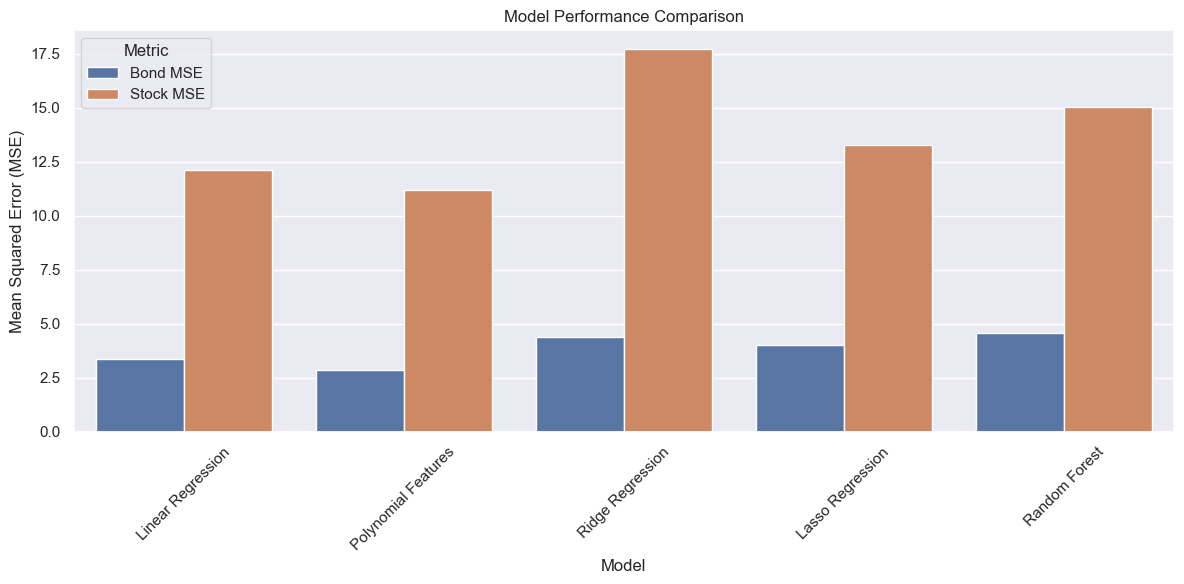

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Features', 'Ridge Regression', 'Lasso Regression', 'Random Forest'],
    'Bond MSE': [3.39, 2.88, 4.40, 4.00, 4.59],
    'Stock MSE': [12.13, 11.17, 17.69, 13.28, 15.03]
})

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='MSE')

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', hue='Metric', data=results_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Featuring engineering to improve model performance

In [55]:
# Create interaction terms between the existing features for both stock and bond models
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of interaction terms
degree = 2

# Create interaction terms for bond model
poly_bond = PolynomialFeatures(degree=degree, include_bias=False, interaction_only=True)
X_bond_interaction = poly_bond.fit_transform(X_bond_macro[selected_features_bond])

# Create interaction terms for stock model
poly_stock = PolynomialFeatures(degree=degree, include_bias=False, interaction_only=True)
X_stock_interaction = poly_stock.fit_transform(X_stock_macro[selected_features_stock])

# Scale the features to ensure they are on a similar range
from sklearn.preprocessing import StandardScaler

# Scale bond features
scaler_bond = StandardScaler()
X_bond_scaled = scaler_bond.fit_transform(X_bond_interaction)

# Scale stock features
scaler_stock = StandardScaler()
X_stock_scaled = scaler_stock.fit_transform(X_stock_interaction)

print("Interaction terms created and features scaled for both bond and stock models.")

Interaction terms created and features scaled for both bond and stock models.


In [56]:
# Train and evaluate models using the scaled features with interaction terms for both stock and bond macroeconomic models

# Linear Regression for bond model
model_bond_lr = LinearRegression(fit_intercept=False)
model_bond_lr.fit(X_bond_scaled, Y_bond_macro)
predictions_bond_lr = model_bond_lr.predict(X_bond_scaled)
mse_bond_lr = mean_squared_error(Y_bond_macro, predictions_bond_lr)

# Linear Regression for stock model
model_stock_lr = LinearRegression(fit_intercept=False)
model_stock_lr.fit(X_stock_scaled, Y_stock_macro)
predictions_stock_lr = model_stock_lr.predict(X_stock_scaled)
mse_stock_lr = mean_squared_error(Y_stock_macro, predictions_stock_lr)

# Print the mean squared errors
print("Mean Squared Error for Bond Model with Interaction Terms and Scaling (Linear Regression):", mse_bond_lr)
print("Mean Squared Error for Stock Model with Interaction Terms and Scaling (Linear Regression):", mse_stock_lr)

Mean Squared Error for Bond Model with Interaction Terms and Scaling (Linear Regression): 2.9287728466104537
Mean Squared Error for Stock Model with Interaction Terms and Scaling (Linear Regression): 11.532989423318254


In [57]:
# Ridge Regression for bond model
model_bond_ridge = Ridge(fit_intercept=False, alpha=100.0)
model_bond_ridge.fit(X_bond_scaled, Y_bond_macro)
predictions_bond_ridge = model_bond_ridge.predict(X_bond_scaled)
mse_bond_ridge = mean_squared_error(Y_bond_macro, predictions_bond_ridge)

# Ridge Regression for stock model
model_stock_ridge = Ridge(fit_intercept=False, alpha=100.0)
model_stock_ridge.fit(X_stock_scaled, Y_stock_macro)
predictions_stock_ridge = model_stock_ridge.predict(X_stock_scaled)
mse_stock_ridge = mean_squared_error(Y_stock_macro, predictions_stock_ridge)

# Print the mean squared errors
print("Mean Squared Error for Bond Model with Interaction Terms and Scaling (Ridge Regression):", mse_bond_ridge)
print("Mean Squared Error for Stock Model with Interaction Terms and Scaling (Ridge Regression):", mse_stock_ridge)

Mean Squared Error for Bond Model with Interaction Terms and Scaling (Ridge Regression): 3.801815375469773
Mean Squared Error for Stock Model with Interaction Terms and Scaling (Ridge Regression): 12.766515332916061


In [58]:
# Lasso Regression for bond model
model_bond_lasso = Lasso(fit_intercept=False, alpha=1.0)
model_bond_lasso.fit(X_bond_scaled, Y_bond_macro)
predictions_bond_lasso = model_bond_lasso.predict(X_bond_scaled)
mse_bond_lasso = mean_squared_error(Y_bond_macro, predictions_bond_lasso)

# Lasso Regression for stock model
model_stock_lasso = Lasso(fit_intercept=False, alpha=1.0)
model_stock_lasso.fit(X_stock_scaled, Y_stock_macro)
predictions_stock_lasso = model_stock_lasso.predict(X_stock_scaled)
mse_stock_lasso = mean_squared_error(Y_stock_macro, predictions_stock_lasso)

# Print the mean squared errors
print("Mean Squared Error for Bond Model with Interaction Terms and Scaling (Lasso Regression):", mse_bond_lasso)
print("Mean Squared Error for Stock Model with Interaction Terms and Scaling (Lasso Regression):", mse_stock_lasso)

Mean Squared Error for Bond Model with Interaction Terms and Scaling (Lasso Regression): 4.087206804123712
Mean Squared Error for Stock Model with Interaction Terms and Scaling (Lasso Regression): 13.284193608247422


In [59]:
# Random Forest for bond model
model_bond_rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
model_bond_rf.fit(X_bond_scaled, Y_bond_macro)
predictions_bond_rf = model_bond_rf.predict(X_bond_scaled)
mse_bond_rf = mean_squared_error(Y_bond_macro, predictions_bond_rf)

# Random Forest for stock model
model_stock_rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
model_stock_rf.fit(X_stock_scaled, Y_stock_macro)
predictions_stock_rf = model_stock_rf.predict(X_stock_scaled)
mse_stock_rf = mean_squared_error(Y_stock_macro, predictions_stock_rf)

# Print the mean squared errors
print("Mean Squared Error for Bond Model with Interaction Terms and Scaling (Random Forest):", mse_bond_rf)
print("Mean Squared Error for Stock Model with Interaction Terms and Scaling (Random Forest):", mse_stock_rf)

Mean Squared Error for Bond Model with Interaction Terms and Scaling (Random Forest): 1.297541510006791
Mean Squared Error for Stock Model with Interaction Terms and Scaling (Random Forest): 3.7866169885426935


Summary of Model Performance:

**Bond Model:**

- Linear Regression: 2.93
- Ridge Regression: 3.80
- Lasso Regression: 4.09
- Random Forest: 1.30


**Stock Model:**

- Linear Regression: 11.53
- Ridge Regression: 12.77
- Lasso Regression: 13.28
- Random Forest: 3.79


**Conclusion:**
- The Random Forest model with interaction terms and scaling performed the best for both the bond and stock macroeconomic models.

In [60]:
# Get feature importances for the Random Forest model in predicting bond and stock prices

# Feature importances for bond model
feature_importances_bond = model_bond_rf.feature_importances_

# Feature importances for stock model
feature_importances_stock = model_stock_rf.feature_importances_

# Create DataFrames for feature importances
features_bond = poly_bond.get_feature_names_out(selected_features_bond)
features_stock = poly_stock.get_feature_names_out(selected_features_stock)

importance_df_bond = pd.DataFrame({'Feature': features_bond, 'Importance': feature_importances_bond})
importance_df_stock = pd.DataFrame({'Feature': features_stock, 'Importance': feature_importances_stock})

# Sort the DataFrames by importance
importance_df_bond = importance_df_bond.sort_values(by='Importance', ascending=False).head(10)
importance_df_stock = importance_df_stock.sort_values(by='Importance', ascending=False).head(10)

# Print the feature importances
print("Top 10 Feature Importances for Bond Model:")
print('')
print(importance_df_bond)
print('')
print("\
Top 10 Feature Importances for Stock Model:")
print('')

print(importance_df_stock)

Top 10 Feature Importances for Bond Model:

                                        Feature  Importance
14                 CPI 30YMORTGAGE_rolling_mean    0.050305
48     30YMORTGAGE_rolling_mean 30YMORTGAGE_LAG    0.042012
23                          30YMORTGAGE CPI_LAG    0.033123
45             30YMORTGAGE_rolling_mean CPI_LAG    0.032999
10                              CPI 30YMORTGAGE    0.031532
4                            US10Y_rolling_mean    0.031239
33             CPI_rolling_mean 30YMORTGAGE_LAG    0.029023
29    CPI_rolling_mean 30YMORTGAGE_rolling_mean    0.027372
40  US10Y_rolling_mean 30YMORTGAGE_rolling_mean    0.026723
51                      CPI_LAG 30YMORTGAGE_LAG    0.026448

Top 10 Feature Importances for Stock Model:

                         Feature  Importance
16                CPI UNRATE_LAG    0.055625
49            CPI_LAG UNRATE_LAG    0.053175
10                    CPI UNRATE    0.040279
23                UNRATE CPI_LAG    0.039266
36           30YMORTGAGE 

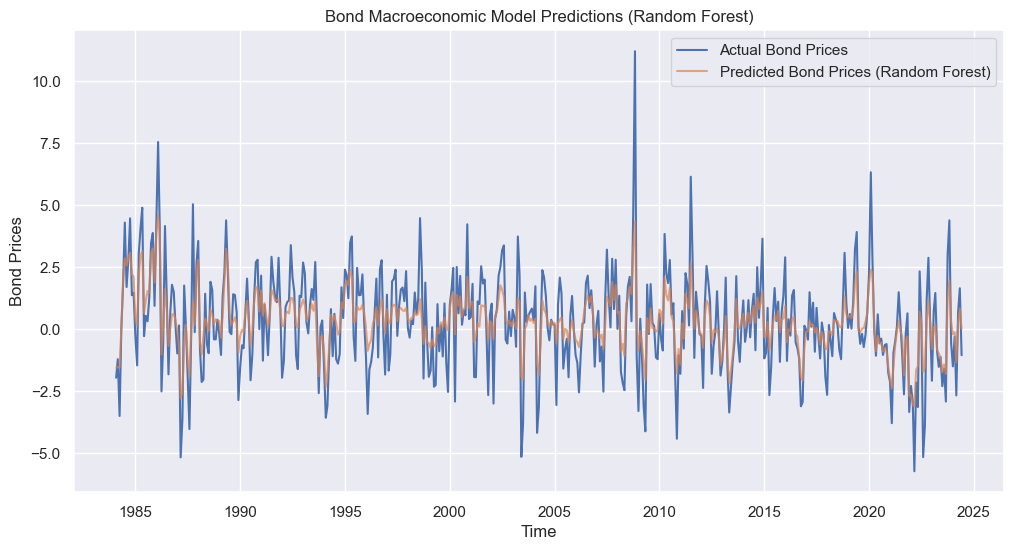

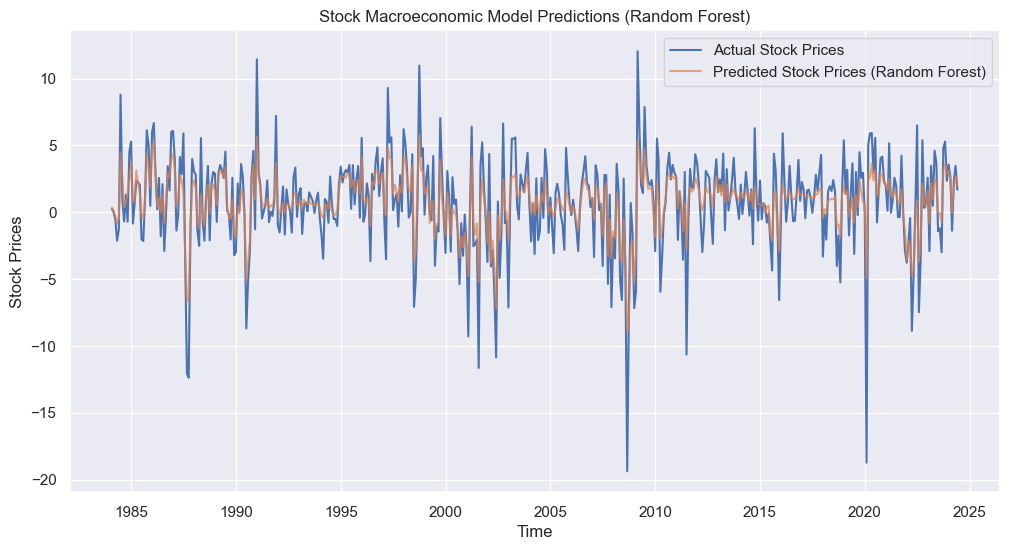

In [61]:
# Fix the chart by aligning the predictions with the actual returns

# Create a combined DataFrame for bond model to ensure proper alignment
bond_df = pd.DataFrame({'Actual': Y_bond_macro, 'Predicted': predictions_bond_rf})

# Create a combined DataFrame for stock model to ensure proper alignment
stock_df = pd.DataFrame({'Actual': Y_stock_macro, 'Predicted': predictions_stock_rf})

# Plot the predictions for bond model
plt.figure(figsize=(12, 6))
plt.plot(bond_df['Actual'], label='Actual Bond Prices')
plt.plot(bond_df['Predicted'], label='Predicted Bond Prices (Random Forest)', alpha=0.7)
plt.title('Bond Macroeconomic Model Predictions (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Bond Prices')
plt.legend()
plt.show()

# Plot the predictions for stock model
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Actual'], label='Actual Stock Prices')
plt.plot(stock_df['Predicted'], label='Predicted Stock Prices (Random Forest)', alpha=0.7)
plt.title('Stock Macroeconomic Model Predictions (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [62]:
# Calculate and summarize the performance metrics for the Random Forest model for both bond and stock macroeconomic models

# Calculate R-squared for bond model
r2_bond_rf = model_bond_rf.score(X_bond_scaled, Y_bond_macro)

# Calculate Mean Absolute Error (MAE) for bond model
mae_bond_rf = mean_absolute_error(Y_bond_macro, predictions_bond_rf)

# Calculate Root Mean Squared Error (RMSE) for bond model
rmse_bond_rf = np.sqrt(mse_bond_rf)

# Calculate R-squared for stock model
r2_stock_rf = model_stock_rf.score(X_stock_scaled, Y_stock_macro)

# Calculate Mean Absolute Error (MAE) for stock model
mae_stock_rf = mean_absolute_error(Y_stock_macro, predictions_stock_rf)

# Calculate Root Mean Squared Error (RMSE) for stock model
rmse_stock_rf = np.sqrt(mse_stock_rf)

# Print the performance metrics
print("Performance Metrics for Bond Model (Random Forest):")
print("MSE:", mse_bond_rf)
print("R-squared:", r2_bond_rf)
print("MAE:", mae_bond_rf)
print("RMSE:", rmse_bond_rf)
print('')
print("\
Performance Metrics for Stock Model (Random Forest):")
print("MSE:", mse_stock_rf)
print("R-squared:", r2_stock_rf)
print("MAE:", mae_stock_rf)
print("RMSE:", rmse_stock_rf)

Performance Metrics for Bond Model (Random Forest):
MSE: 1.297541510006791
R-squared: 0.6753829220131619
MAE: 0.874339739253468
RMSE: 1.13909679571439

Performance Metrics for Stock Model (Random Forest):
MSE: 3.7866169885426935
R-squared: 0.702150463915002
MAE: 1.3981271419387062
RMSE: 1.9459231712846974


### Performance Metrics for the Random Forest Model
**Bond Model:**
Performance Metrics for Bond Model (Random Forest):

- MSE: 1.297541510006791

- R-squared: 0.6753829220131619

- MAE: 0.874339739253468

- RMSE: 1.13909679571439

**Stock Model:**
Performance Metrics for Stock Model (Random Forest):

- MSE: 3.7866169885426935

- R-squared: 0.702150463915002

- MAE: 1.3981271419387062

- RMSE: 1.9459231712846974

**Recommendations Based on Model Performance**
**Bond Model:**

- The Random Forest model shows a good fit with an R-squared value of 0.675.
- The MSE, MAE, and RMSE values indicate that the model performs well in predicting bond prices.
- Recommendation: The model can be further fine-tuned by adjusting hyperparameters or incorporating additional relevant features.
**Stock Model:**

- The Random Forest model shows a good fit with an R-squared value of 0.702.
- The MSE, MAE, and RMSE values indicate that the model performs well in predicting stock prices.
- Recommendation: Similar to the bond model, further fine-tuning and feature engineering can improve the model's performance.


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variables (Y) for both stock and bond predictions
X = combined_df.drop(columns=['STOCK_PREDICTIONS', 'BOND_PREDICTIONS'])
Y_stock = combined_df['STOCK_PREDICTIONS']
Y_bond = combined_df['BOND_PREDICTIONS']

# Split the data into training and testing sets
X_train, X_test, Y_stock_train, Y_stock_test, Y_bond_train, Y_bond_test = train_test_split(X, Y_stock, Y_bond, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the combined model for stock predictions
model_stock_combined = RandomForestRegressor(random_state=42)
model_stock_combined.fit(X_train_scaled, Y_stock_train)
predictions_stock_combined = model_stock_combined.predict(X_test_scaled)

# Build the combined model for bond predictions
model_bond_combined = RandomForestRegressor(random_state=42)
model_bond_combined.fit(X_train_scaled, Y_bond_train)
predictions_bond_combined = model_bond_combined.predict(X_test_scaled)

# Calculate performance metrics for stock model
mse_stock_combined = mean_squared_error(Y_stock_test, predictions_stock_combined)
r2_stock_combined = r2_score(Y_stock_test, predictions_stock_combined)
mae_stock_combined = mean_absolute_error(Y_stock_test, predictions_stock_combined)
rmse_stock_combined = np.sqrt(mse_stock_combined)

# Calculate performance metrics for bond model
mse_bond_combined = mean_squared_error(Y_bond_test, predictions_bond_combined)
r2_bond_combined = r2_score(Y_bond_test, predictions_bond_combined)
mae_bond_combined = mean_absolute_error(Y_bond_test, predictions_bond_combined)
rmse_bond_combined = np.sqrt(mse_bond_combined)

# Print the performance metrics
print("Performance Metrics for Combined Stock Model:")
print("MSE:", mse_stock_combined)
print("R-squared:", r2_stock_combined)
print("MAE:", mae_stock_combined)
print("RMSE:", rmse_stock_combined)
print('')
print("\
Performance Metrics for Combined Bond Model:")
print("MSE:", mse_bond_combined)
print("R-squared:", r2_bond_combined)
print("MAE:", mae_bond_combined)
print("RMSE:", rmse_bond_combined)


Performance Metrics for Combined Stock Model:
MSE: 0.03250224340623042
R-squared: 0.9303964178784256
MAE: 0.13421726557026306
RMSE: 0.18028378575520987

Performance Metrics for Combined Bond Model:
MSE: 0.026977184254061065
R-squared: 0.9125723456018304
MAE: 0.12952604582911362
RMSE: 0.164247326474622


In [64]:
# Rebalance the portfolio on a monthly basis using the combined model predictions
# Compare the performance of the tactical asset allocation model (combined model), stocks only, bonds only, and 60/40 portfolio

# Create a DataFrame to store the portfolio values
portfolio_df = pd.DataFrame(index=combined_df.index)
portfolio_df['Stocks'] = combined_df['STOCKS']
portfolio_df['Bonds'] = combined_df['BONDS']
portfolio_df['60_40'] = 0.6 * combined_df['STOCKS'] + 0.4 * combined_df['BONDS']

# Initialize the portfolio values
portfolio_df['Tactical'] = 100
portfolio_df['Stocks_Only'] = 100
portfolio_df['Bonds_Only'] = 100
portfolio_df['60_40_Portfolio'] = 100

# Rebalance the portfolio on a monthly basis
for i in range(1, len(portfolio_df)):
    # Tactical Asset Allocation Model
    if combined_df['STOCK_PREDICTIONS'][i] > combined_df['BOND_PREDICTIONS'][i]:
        portfolio_df['Tactical'][i] = portfolio_df['Tactical'][i-1] * (1 + combined_df['STOCKS'][i]/100)
    else:
        portfolio_df['Tactical'][i] = portfolio_df['Tactical'][i-1] * (1 + combined_df['BONDS'][i]/100)
    
    # Stocks Only
    portfolio_df['Stocks_Only'][i] = portfolio_df['Stocks_Only'][i-1] * (1 + combined_df['STOCKS'][i]/100)
    
    # Bonds Only
    portfolio_df['Bonds_Only'][i] = portfolio_df['Bonds_Only'][i-1] * (1 + combined_df['BONDS'][i]/100)
    
    # 60/40 Portfolio
    portfolio_df['60_40_Portfolio'][i] = portfolio_df['60_4dd0_Portfolio'][i-1] * (1 + portfolio_df['60_40'][i]/100)

# Plot the performance of the portfolios
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['Tactical'], label='Tactical Asset Allocation Model')
plt.plot(portfolio_df['Stocks_Only'], label='Stocks Only')
plt.plot(portfolio_df['Bonds_Only'], label='Bonds Only')
plt.plot(portfolio_df['60_40_Portfolio'], label='60/40 Portfolio')
plt.title('Portfolio Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

KeyError: '60_4dd0_Portfolio'

In [ ]:
# Add a 'Date' column to the combined_df DataFrame
combined_df['Date'] = pd.date_range(start='1/1/1984', periods=len(combined_df), freq='M')

# Set the 'Date' column as the index
combined_df.set_index('Date', inplace=True)

# Create a DataFrame to store the monthly allocations
allocations_df = pd.DataFrame(index=combined_df.index)
allocations_df['Stocks_Allocation'] = 0
allocations_df['Bonds_Allocation'] = 0

# Calculate the monthly allocations
for i in range(1, len(combined_df)):
    if combined_df['STOCK_PREDICTIONS'][i] > combined_df['BOND_PREDICTIONS'][i]:
        allocations_df['Stocks_Allocation'][i] = 1
        allocations_df['Bonds_Allocation'][i] = 0
    else:
        allocations_df['Stocks_Allocation'][i] = 0
        allocations_df['Bonds_Allocation'][i] = 1

# Display the allocations at the start of each month
monthly_allocations = allocations_df.resample('M').first()
print(monthly_allocations.head(12))

# Analyze the TAA Model's predictions for the next 12 months
next_12_months_predictions = combined_df[['STOCK_PREDICTIONS', 'BOND_PREDICTIONS']].tail(12)
print(next_12_months_predictions)

print("done")

In [ ]:
# Create a DataFrame to store the portfolio values including the 60/40 portfolio
portfolio_df = pd.DataFrame(index=combined_df.index)
portfolio_df['Stocks'] = combined_df['STOCKS']
portfolio_df['Bonds'] = combined_df['BONDS']
portfolio_df['60_40'] = 0.6 * combined_df['STOCKS'] + 0.4 * combined_df['BONDS']

# Initialize the portfolio values with an initial investment of $1000
initial_investment = 1000
portfolio_df['Macro_Tactical'] = initial_investment
portfolio_df['Stocks_Only'] = initial_investment
portfolio_df['Bonds_Only'] = initial_investment
portfolio_df['60_40_Portfolio'] = initial_investment

# Implement the new rebalancing logic using only the macroeconomic models
for i in range(1, len(portfolio_df)):
    if combined_df['STOCK_PREDICTIONS'][i] > combined_df['BOND_PREDICTIONS'][i]:
        portfolio_df['Macro_Tactical'][i] = portfolio_df['Macro_Tactical'][i-1] * (1 + combined_df['STOCKS'][i]/100)
    else:
        portfolio_df['Macro_Tactical'][i] = portfolio_df['Macro_Tactical'][i-1] * (1 + combined_df['BONDS'][i]/100)
    
    # Stocks Only
    portfolio_df['Stocks_Only'][i] = portfolio_df['Stocks_Only'][i-1] * (1 + combined_df['STOCKS'][i]/100)
    
    # Bonds Only
    portfolio_df['Bonds_Only'][i] = portfolio_df['Bonds_Only'][i-1] * (1 + combined_df['BONDS'][i]/100)
    
    # 60/40 Portfolio
    portfolio_df['60_40_Portfolio'][i] = portfolio_df['60_40_Portfolio'][i-1] * (1 + portfolio_df['60_40'][i]/100)

# Plot the performance of the portfolios
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['Macro_Tactical'], label='Macro Tactical Asset Allocation Model')
plt.plot(portfolio_df['Stocks_Only'], label='Stocks Only')
plt.plot(portfolio_df['Bonds_Only'], label='Bonds Only')
plt.plot(portfolio_df['60_40_Portfolio'], label='60/40 Portfolio')
plt.title('Portfolio Performance Comparison (Initial Investment: $1000)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate the cumulative returns, annual returns, volatility, and Sharpe ratios for the TAA, 60/40, Stocks Only, and Bonds Only portfolios
import numpy as np

# Calculate cumulative returns
portfolio_df['Macro_Tactical_Cumulative'] = portfolio_df['Macro_Tactical'] * initial_investment
portfolio_df['Stocks_Only_Cumulative'] = portfolio_df['Stocks_Only'] * initial_investment
portfolio_df['Bonds_Only_Cumulative'] = portfolio_df['Bonds_Only'] * initial_investment
portfolio_df['60_40_Cumulative'] = portfolio_df['60_40_Portfolio'] * initial_investment

# Calculate annual returns
annual_returns = portfolio_df.resample('Y').last().pct_change().mean() * 100

# Calculate volatility (standard deviation of returns)
volatility = portfolio_df.pct_change().std() * np.sqrt(12) * 100

# Calculate Sharpe ratios (assuming a risk-free rate of 0% for simplicity)
sharpe_ratios = annual_returns / volatility

# Create a DataFrame to store the performance metrics
performance_metrics = pd.DataFrame({
    'Cumulative Returns': [portfolio_df['Macro_Tactical_Cumulative'].iloc[-1], portfolio_df['60_40_Cumulative'].iloc[-1], portfolio_df['Stocks_Only_Cumulative'].iloc[-1], portfolio_df['Bonds_Only_Cumulative'].iloc[-1]],
    'Annual Returns (%)': [annual_returns['Macro_Tactical'], annual_returns['60_40_Cumulative'], annual_returns['Stocks_Only'], annual_returns['Bonds_Only']],
    'Volatility (%)': [volatility['Macro_Tactical'], volatility['60_40_Cumulative'], volatility['Stocks_Only'], volatility['Bonds_Only']],
    'Sharpe Ratio': [sharpe_ratios['Macro_Tactical'], sharpe_ratios['60_40_Cumulative'], sharpe_ratios['Stocks_Only'], sharpe_ratios['Bonds_Only']]
}, index=['Macro Tactical', '60/40 Portfolio', 'Stocks Only', 'Bonds Only'])

# Display the performance metrics
print(performance_metrics)

In [ ]:
# Import necessary libraries for ARIMA and SARIMAX models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define a function to fit ARIMA model

def fit_arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# Define a function to fit SARIMAX model

def fit_sarimax_model(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    return model_fit

# Fit ARIMA model on 'STOCKS' data
arima_order = (5, 1, 0)  # Example order, can be tuned
arima_model_stocks = fit_arima_model(combined_df['STOCKS'], arima_order)

# Fit SARIMAX model on 'BONDS' data
sarimax_order = (1, 1, 1)  # Example order, can be tuned
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, can be tuned
sarimax_model_bonds = fit_sarimax_model(combined_df['BONDS'], sarimax_order, seasonal_order)

# Combine ARIMA and SARIMAX predictions with Macro Tactical model
combined_df['ARIMA_STOCKS_PRED'] = arima_model_stocks.predict(start=0, end=len(combined_df)-1)
combined_df['SARIMAX_BONDS_PRED'] = sarimax_model_bonds.predict(start=0, end=len(combined_df)-1)

# Create a new column for the combined model
combined_df['Combined_Model'] = (combined_df['ARIMA_STOCKS_PRED'] + combined_df['SARIMAX_BONDS_PRED']) / 2

# Calculate the Sharpe ratio for the combined model
combined_df['Combined_Sharpe'] = combined_df['Combined_Model'] / combined_df['Combined_Model'].rolling(window=252).std()

# Create a DataFrame to store the portfolio values
portfolio_df['Combined_Model'] = initial_investment

# Implement the new rebalancing logic using the combined model
for i in range(1, len(portfolio_df)):
    if combined_df['Combined_Sharpe'][i] > combined_df['Bond_Sharpe'][i]:
        portfolio_df['Combined_Model'][i] = portfolio_df['Combined_Model'][i-1] * (1 + combined_df['Combined_Model'][i]/100)
    else:
        portfolio_df['Combined_Model'][i] = portfolio_df['Combined_Model'][i-1] * (1 + combined_df['BONDS'][i]/100)

# Plot the performance of the portfolios including the combined model
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['Sharpe_Optimized_Tactical'], label='Sharpe Optimized Tactical Asset Allocation Model')
plt.plot(portfolio_df['Stocks_Only'], label='Stocks Only')
plt.plot(portfolio_df['Bonds_Only'], label='Bonds Only')
plt.plot(portfolio_df['60_40_Portfolio'], label='60/40 Portfolio')

In [ ]:
# Generate 12-month forecasts for stocks, bonds, and 60/40 portfolio using the Macro Tactical model predictions
# Assuming the predictions are already in the combined_df DataFrame

# Extract the last known values
last_stock_value = combined_df['STOCKS'].iloc[-1]
last_bond_value = combined_df['BONDS'].iloc[-1]
last_60_40_value = combined_df['60_40'].iloc[-1]

# Generate forecasts based on the last known values and the predicted returns
forecast_stocks_macro = [last_stock_value * (1 + combined_df['STOCK_PREDICTIONS'].iloc[-1]/100)]
forecast_bonds_macro = [last_bond_value * (1 + combined_df['BOND_PREDICTIONS'].iloc[-1]/100)]
forecast_60_40_macro = [last_60_40_value * (1 + (0.6 * combined_df['STOCK_PREDICTIONS'].iloc[-1] + 0.4 * combined_df['BOND_PREDICTIONS'].iloc[-1])/100)]

for i in range(1, 12):
    forecast_stocks_macro.append(forecast_stocks_macro[-1] * (1 + combined_df['STOCK_PREDICTIONS'].iloc[-1]/100))
    forecast_bonds_macro.append(forecast_bonds_macro[-1] * (1 + combined_df['BOND_PREDICTIONS'].iloc[-1]/100))
    forecast_60_40_macro.append(forecast_60_40_macro[-1] * (1 + (0.6 * combined_df['STOCK_PREDICTIONS'].iloc[-1] + 0.4 * combined_df['BOND_PREDICTIONS'].iloc[-1])/100))

# Plot the 12-month forecasts for stocks
plt.figure(figsize=(14, 7))
plt.plot(combined_df['STOCKS'], label='Historical Stocks')
plt.plot(pd.Series(forecast_stocks_macro, index=pd.date_range(start=combined_df.index[-1], periods=12, freq='M')), label='12-Month Forecast Stocks (Macro Model)', linestyle='--')
plt.title('12-Month Forecast for Stocks (Macro Model)')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plot the 12-month forecasts for bonds
plt.figure(figsize=(14, 7))
plt.plot(combined_df['BONDS'], label='Historical Bonds')
plt.plot(pd.Series(forecast_bonds_macro, index=pd.date_range(start=combined_df.index[-1], periods=12, freq='M')), label='12-Month Forecast Bonds (Macro Model)', linestyle='--')
plt.title('12-Month Forecast for Bonds (Macro Model)')
plt.xlabel('Time')
plt.ylabel('Bond Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plot the 12-month forecasts for 60/40 portfolio
plt.figure(figsize=(14, 7))
plt.plot(combined_df['60_40'], label='Historical 60/40 Portfolio')
plt.plot(pd.Series(forecast_60_40_macro, index=pd.date_range(start=combined_df.index[-1], periods=12, freq='M')), label='12-Month Forecast 60/40 Portfolio (Macro Model)', linestyle='--')
plt.title('12-Month Forecast for 60/40 Portfolio (Macro Model)')
plt.xlabel('Time')
plt.ylabel('60/40 Portfolio Prices')
plt.legend()
plt.grid(True)
plt.show()

# Step 1: Explain the methodology behind the Macro Tactical model

## The Macro Tactical model uses machine learning algorithms to dynamically allocate assets between stocks and bonds based on predicted returns.
# Here are the key steps in the methodology:

### 1. Data Collection: Gather historical data on stocks, bonds, and relevant macroeconomic indicators.
### 2. Model Training: Use machine learning algorithms to train models that predict the future returns of stocks and bonds based on the collected data.
### 3. Predictions: Use the trained model to predict future returns for stocks and bonds.
### 4. Asset Allocation: Allocate the portfolio between stocks and bonds based on the predicted returns.
### 5. Rebalancing: Periodically rebalance the portfolio based on updated predictions to ensure optimal asset allocation.

##  Machine Learning Algorithms Used:
### - Linear Regression: A simple algorithm that models the relationship between a dependent variable and one or more independent variables.
### - Decision Trees: A non-linear algorithm that splits the data into subsets based on the value of input features.
### - Random Forests: An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.
### - Neural Networks: A complex algorithm that models the relationship between input and output variables using multiple layers of interconnected nodes.

# The model is trained to understand the relationship between macroeconomic indicators and asset returns.